# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [51]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 yellowbrick==1.5 -q --user


In [52]:
!pip install pandas==2.0.3 -q --user


In [53]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

Importing necessary libraries

In [54]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
data = pd.read_csv('/content/drive/MyDrive/datasets/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [57]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [58]:
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [59]:
# let's view a random sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [60]:
data.shape

(340, 15)

This dataset has 340 rows and 15 columns.

In [61]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

There are 4 categorical variables and 11 numeric(4 integers and 7 float). This dataset uses 40 KB of memory.

In [62]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

Checking for duplicates

In [63]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


Checking for missing values

In [64]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


There are no missing values on this dataset

Statistical summary of the data

In [65]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


The above table displays all the basic statistical information of each variable.

## Exploratory Data Analysis (EDA)


# ***Univariate analysis***

## **Numeric variable visualization**

The functions below will be very helpful in the EDA process.

In [66]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [67]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Lets visualise each variable seperately

**Current Price**

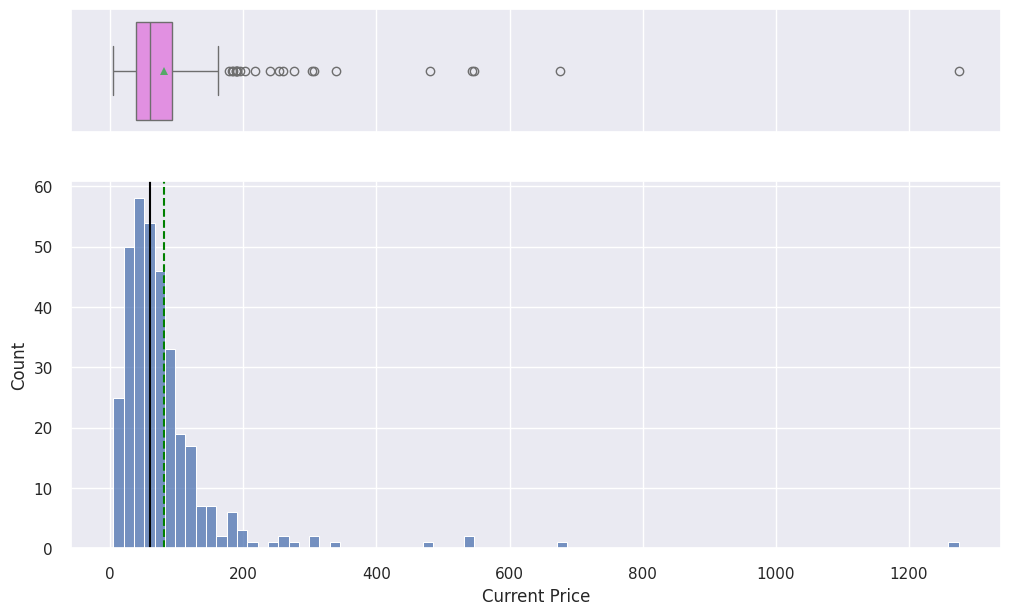

In [68]:
histogram_boxplot(df,'Current Price')

The current price is right-skewed with a long right tail.

**Price Change**

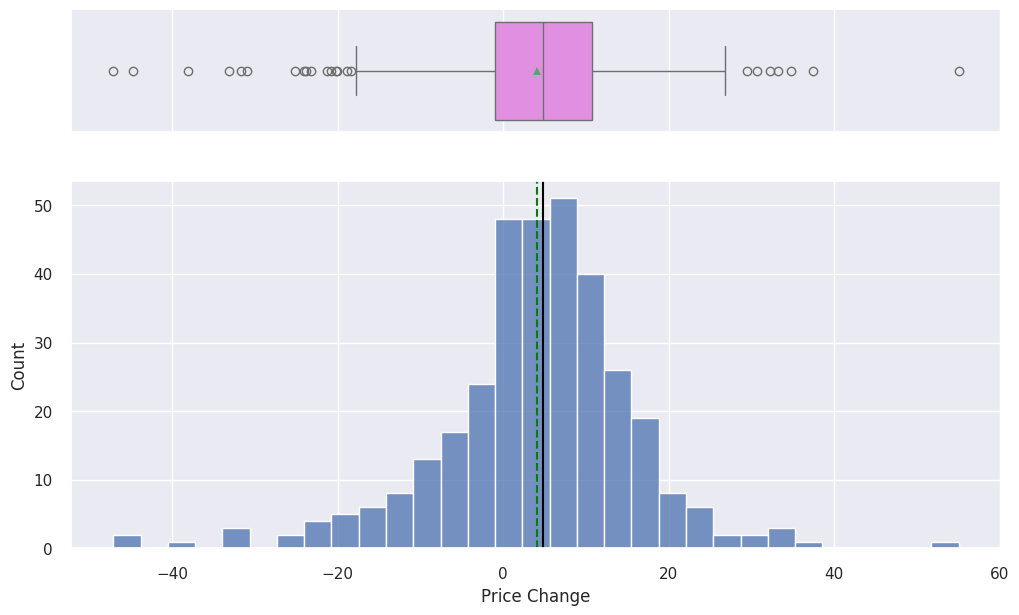

In [69]:
histogram_boxplot(df, 'Price Change')

The price change is approximately normally distributed with outliers on both sides.

**Volatility**

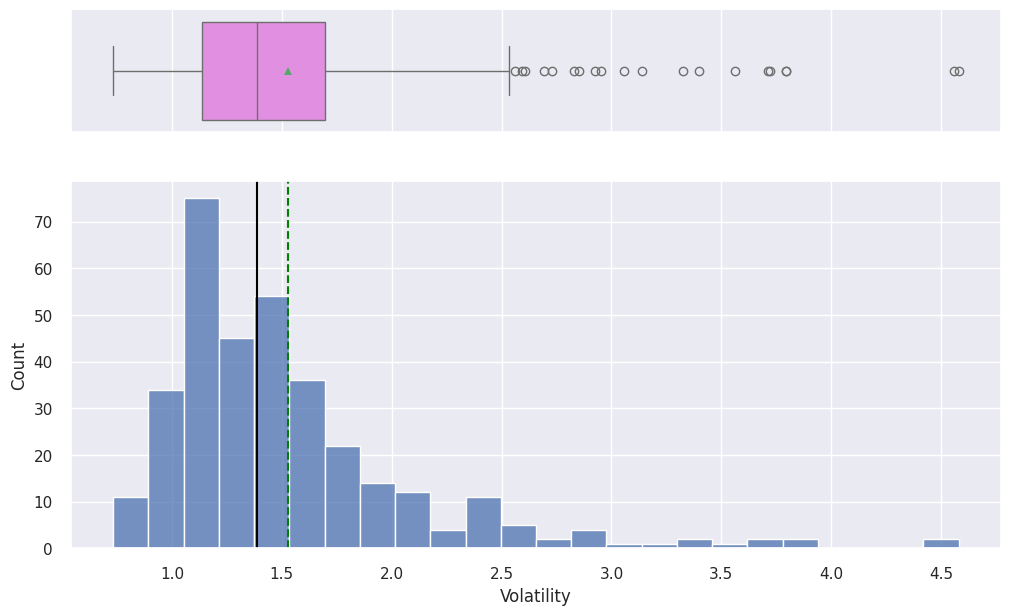

In [70]:
histogram_boxplot(df, 'Volatility')

Volatility has a long right tail hence it is right skewed. The mean is slightly higher than the median.

**ROE**

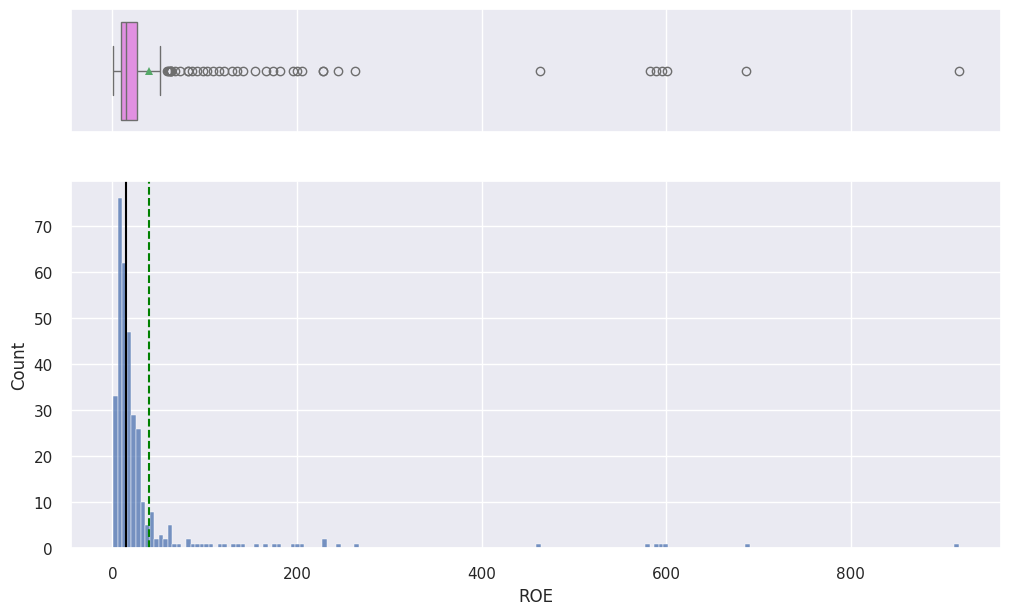

In [71]:
histogram_boxplot(df,'ROE')

ROE has a huge right tail. Distribution is right skewed with many outliers on the right hence the mean is significantly higher than the median.

**Cash Ratio**

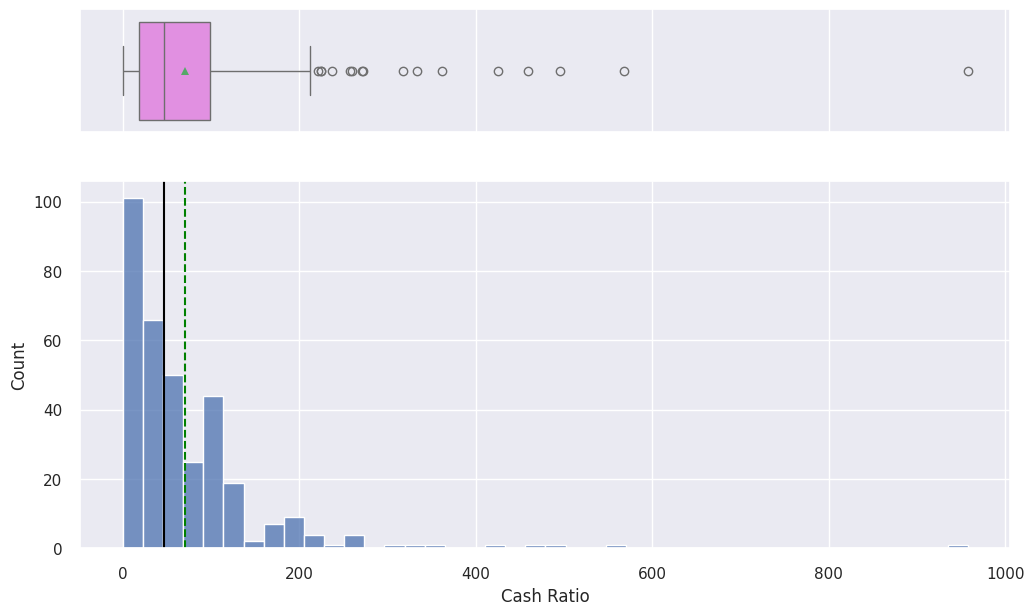

In [72]:
histogram_boxplot(df,"Cash Ratio")

The cash ratio is right-skewed with many outliers on the right. Mean is greater than median.

**Net Cash Flow**

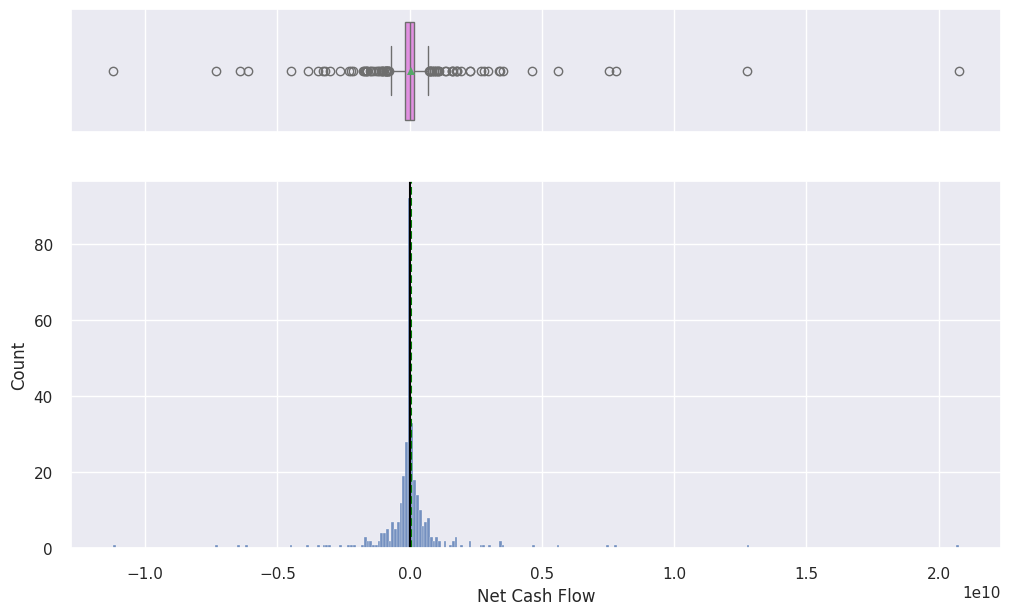

In [73]:
histogram_boxplot(df,'Net Cash Flow')

Net cash flow is approximately normally distributed with many outliers on both sides.

**Net Income**

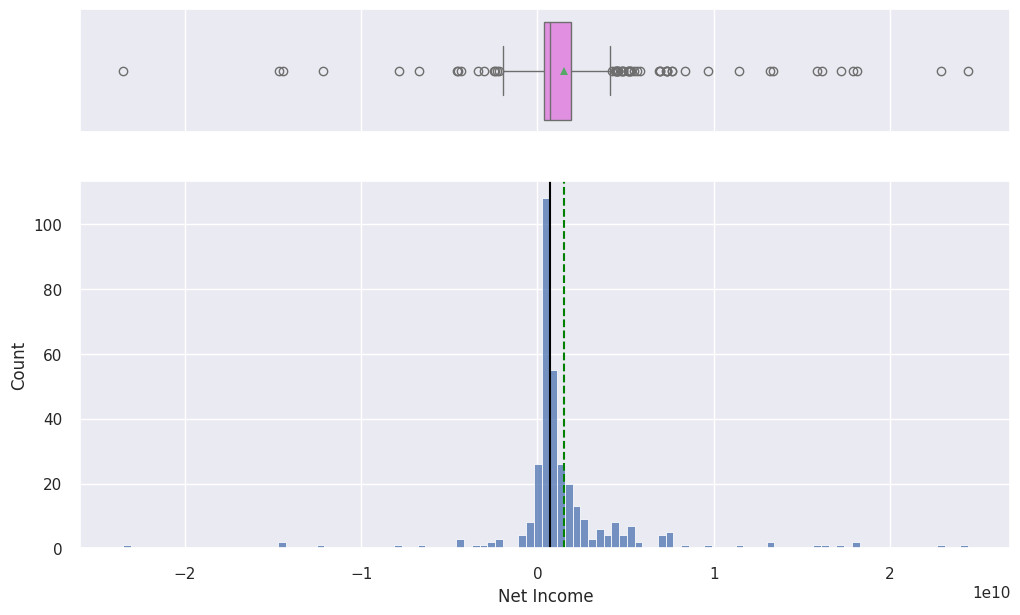

In [74]:
histogram_boxplot(df,'Net Income')

Net Income is slightly right skewed with outliers on both sides. Most of them are on the right hence, the mean is bigger than the median.

**Earnings Per Share**

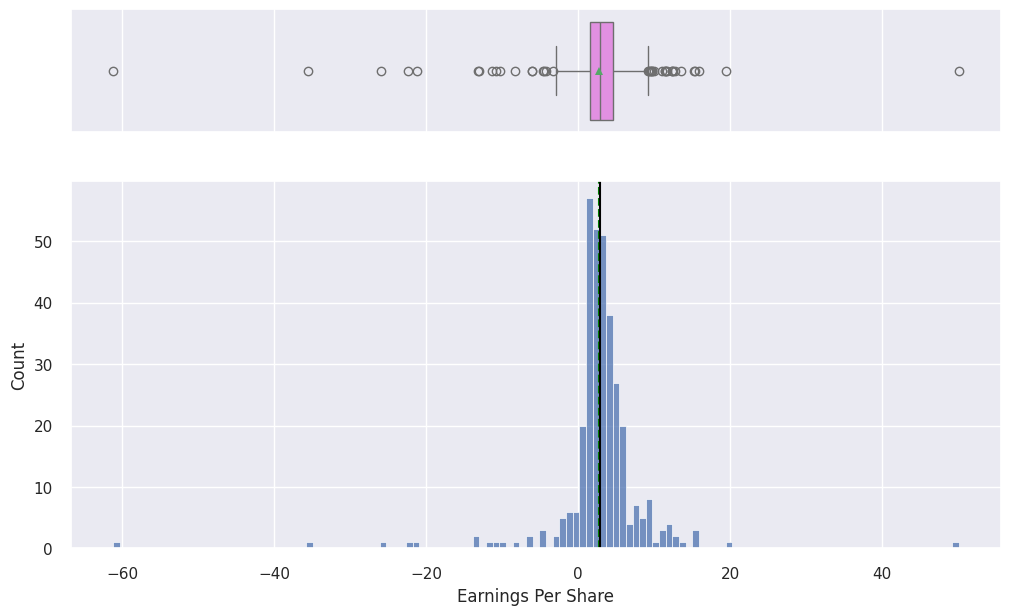

In [75]:
histogram_boxplot(df,'Earnings Per Share')

Earnings Per Share is more or less normally distributed with outliers on both sides. The mean is slightly smaller than the median.

**Estimated Shares Outstanding**

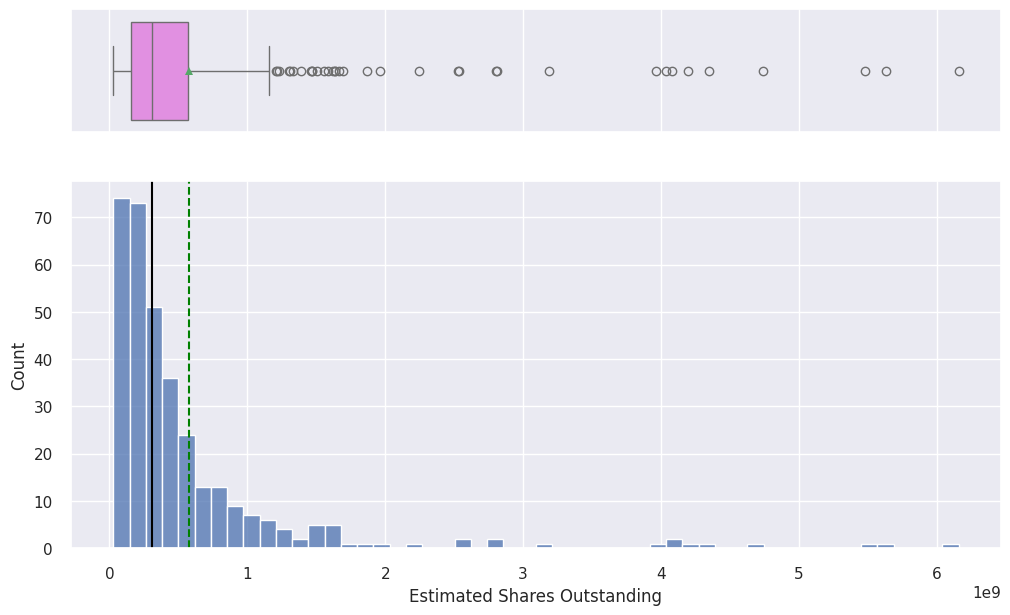

In [76]:
histogram_boxplot(df,'Estimated Shares Outstanding')

Estimated Shares Outstanding has a big right tail and hence is right skewed. The mean is significantly higher than the median.

**P/E Ratio**

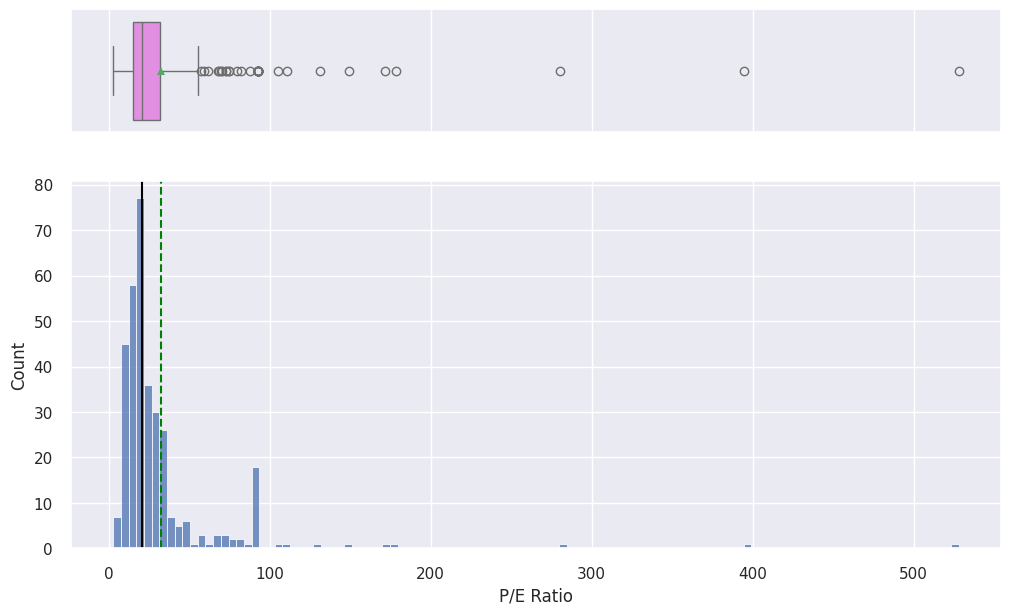

In [77]:
histogram_boxplot(df,'P/E Ratio')

The P/E Ratio is right skewed and has a long right tail. The mean is greater than the median.

**P/B Ratio**

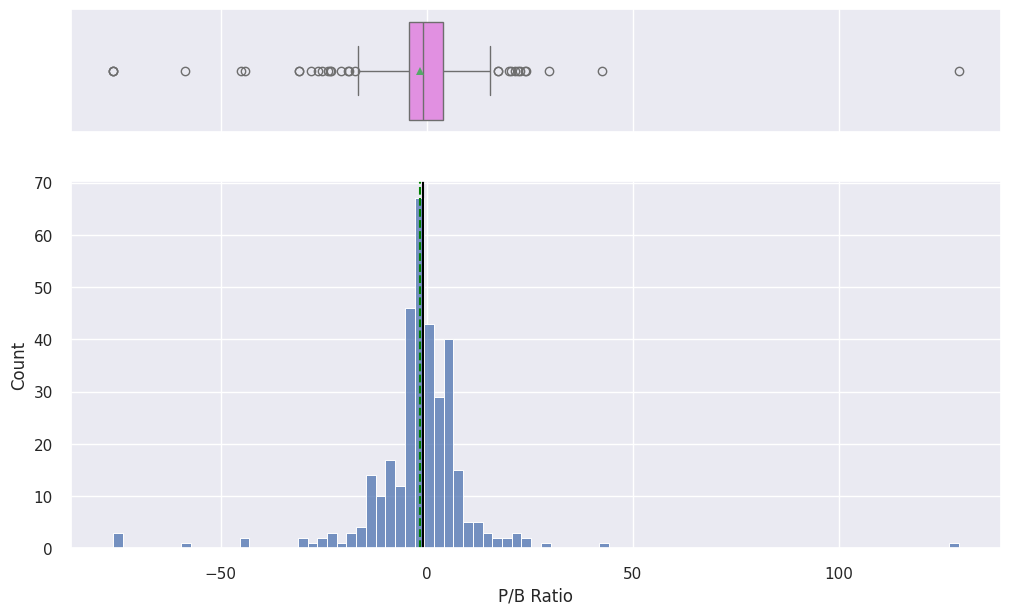

In [78]:
histogram_boxplot(df,'P/B Ratio')

P/B Ratio distribution is approximately normally distributed with outliers on both sides and mean slightly lower than the median.

## **Categorical variable visualization**

In [79]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**GICS Sector**

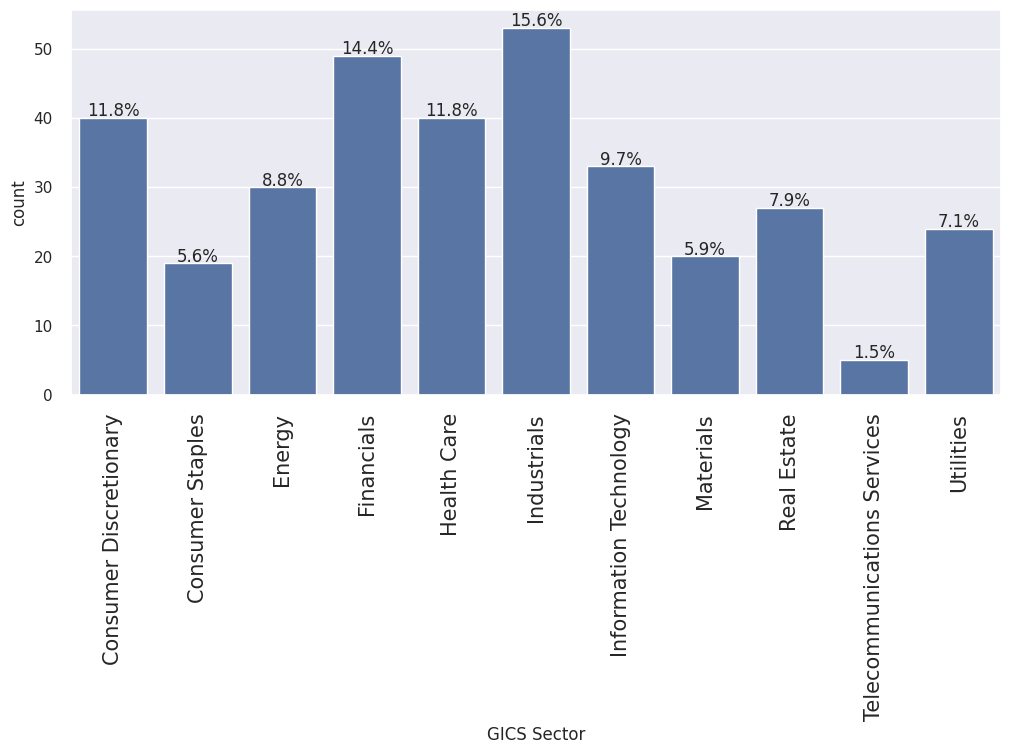

In [80]:
labeled_barplot(df, 'GICS Sector', perc=True)

Industrials is the most common sector followed by financial and consumer discretionary. Telecommunications are the least common sector.

**GICS Sub Industry**

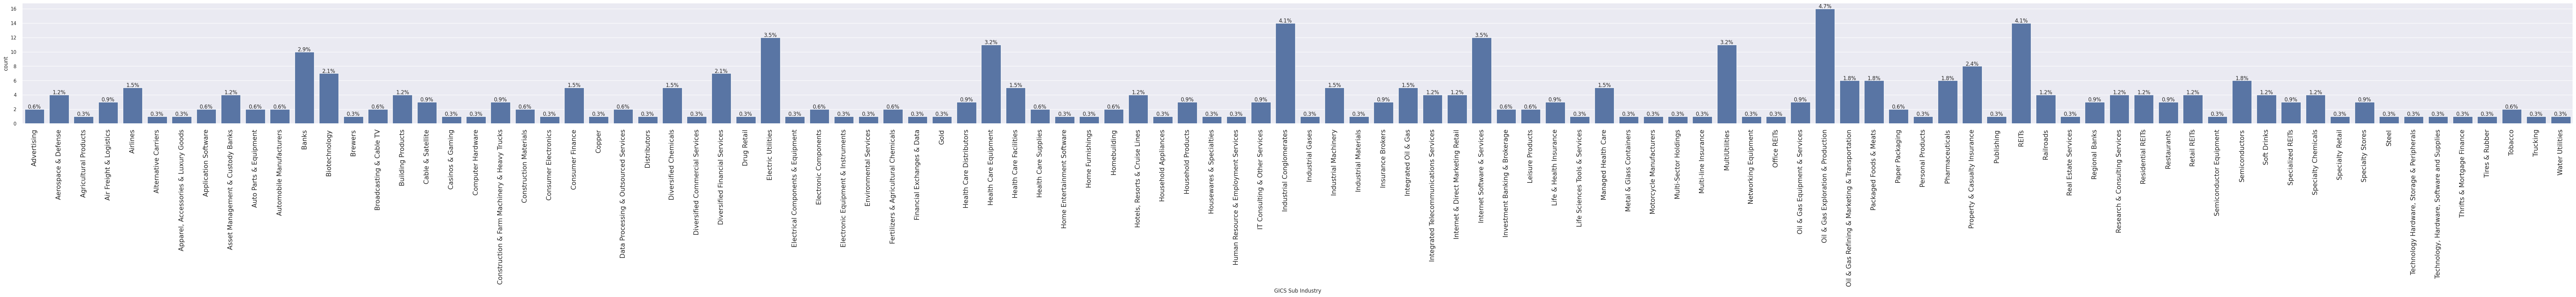

In [81]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

This variable has high variance. Oil and gas exploration and production is the most common with 4,7% followed by REITs and industrial conglomerates with 4,1%

# Bivariate analysis

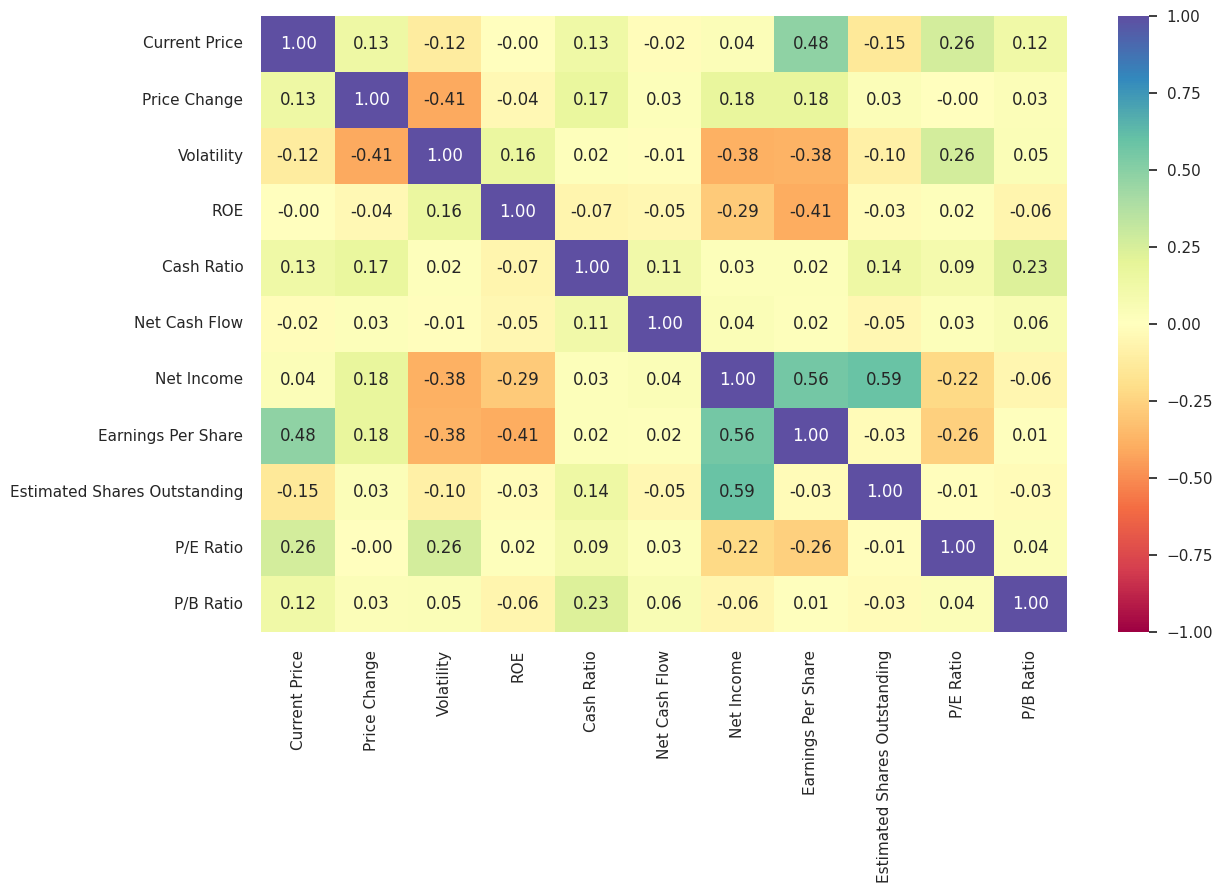

In [82]:
# correlation check
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(13, 8))
sns.heatmap(
    numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


In general, there is not a high level of correlation between variables. Net income is negatively correlated to volatility P/E ratio and ROE while it is positively correlated to earnings per share and estimated shares outstanding. Volatility is also negatively correlated to price change and earnings per share. The current price also has a relevant correlation to earnings per share. A maximum positive correlation is 0,59 while a minimum negative is -0,41.

Let's check the stocks of which economic sector have seen the maximum price increase on average.

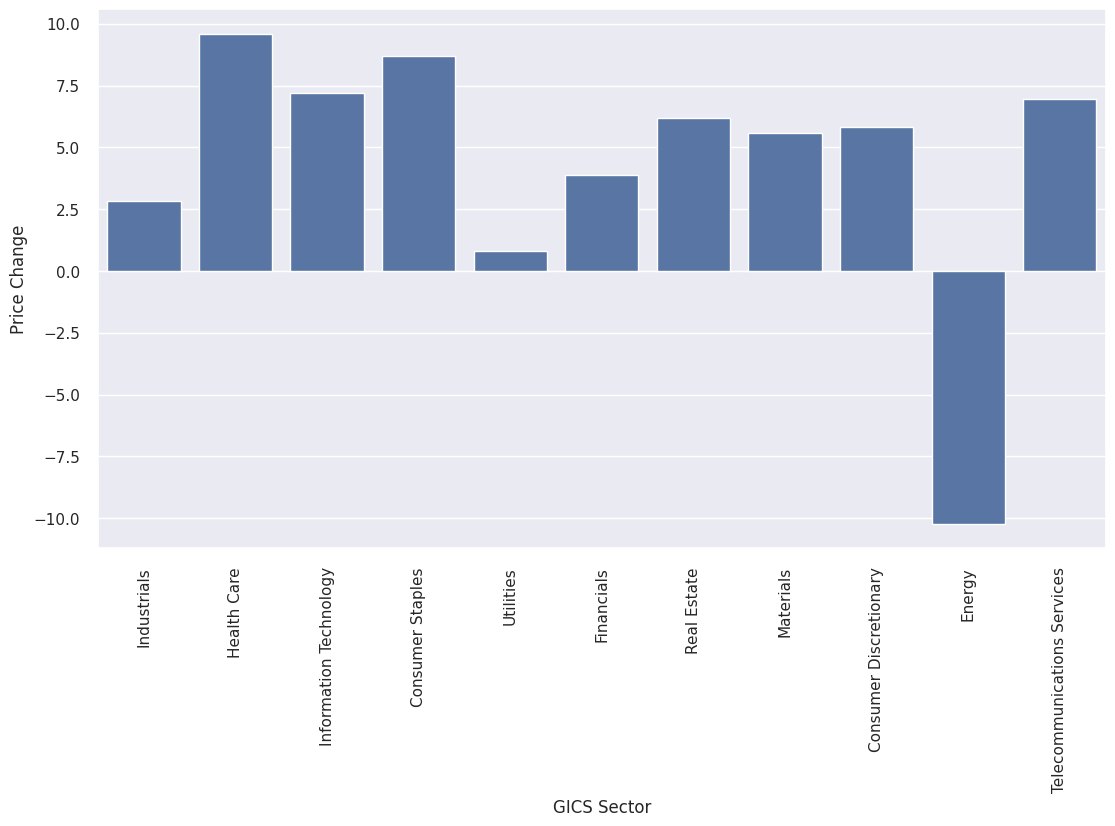

In [83]:
plt.figure(figsize=(13,7))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

Sectors with maximum price increase on stocks are Health Care, Consumer Staples, and Information Technology respectively.

Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.

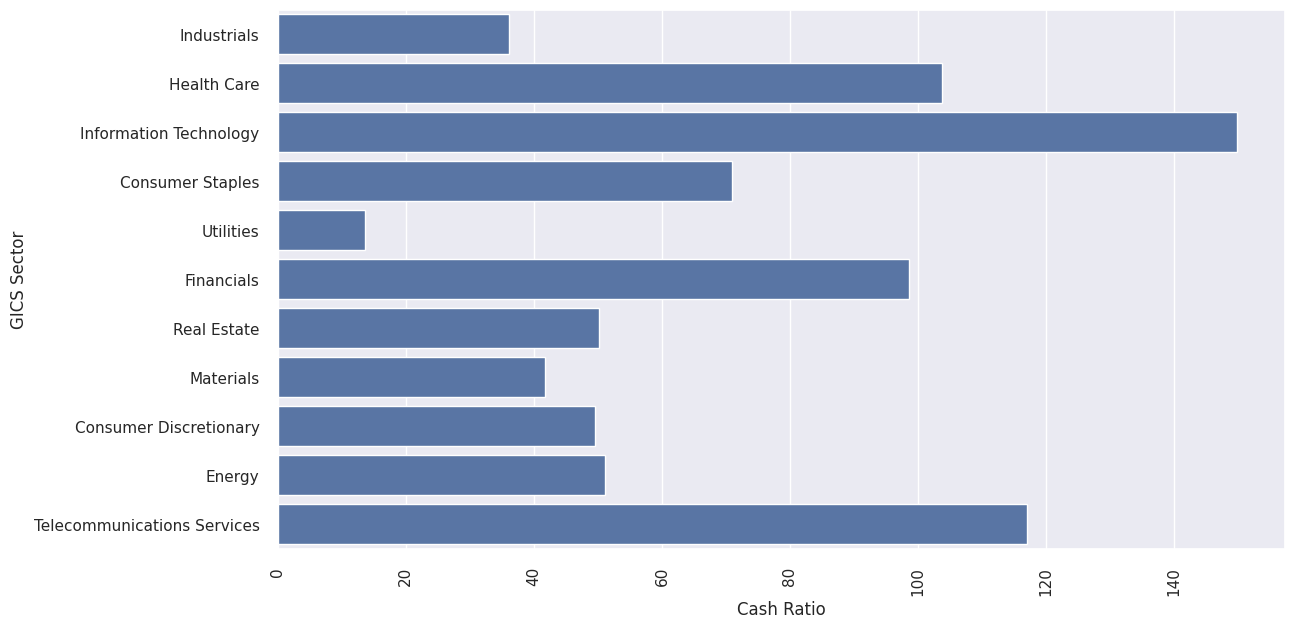

In [84]:
plt.figure(figsize=(13,7))
sns.barplot(data=df, x='Cash Ratio', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

Information Technology, Telecommunication Services and Health Care have the highest Cash ratio respectively. Utilities have the lowest Cash ratio.

P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.

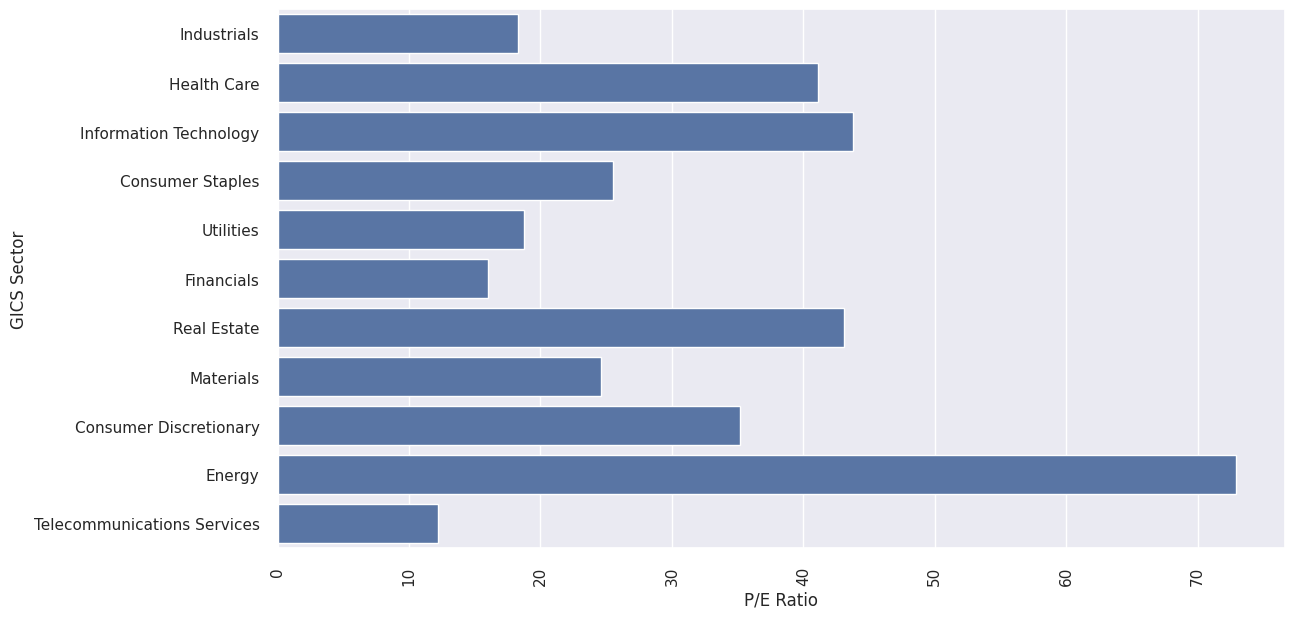

In [85]:
plt.figure(figsize=(13,7))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

Energy has by far the highest P/E ratio (more than 70%) followed by real estate and information technology. Telecommunication services are in the last place with less than 15%.

Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors

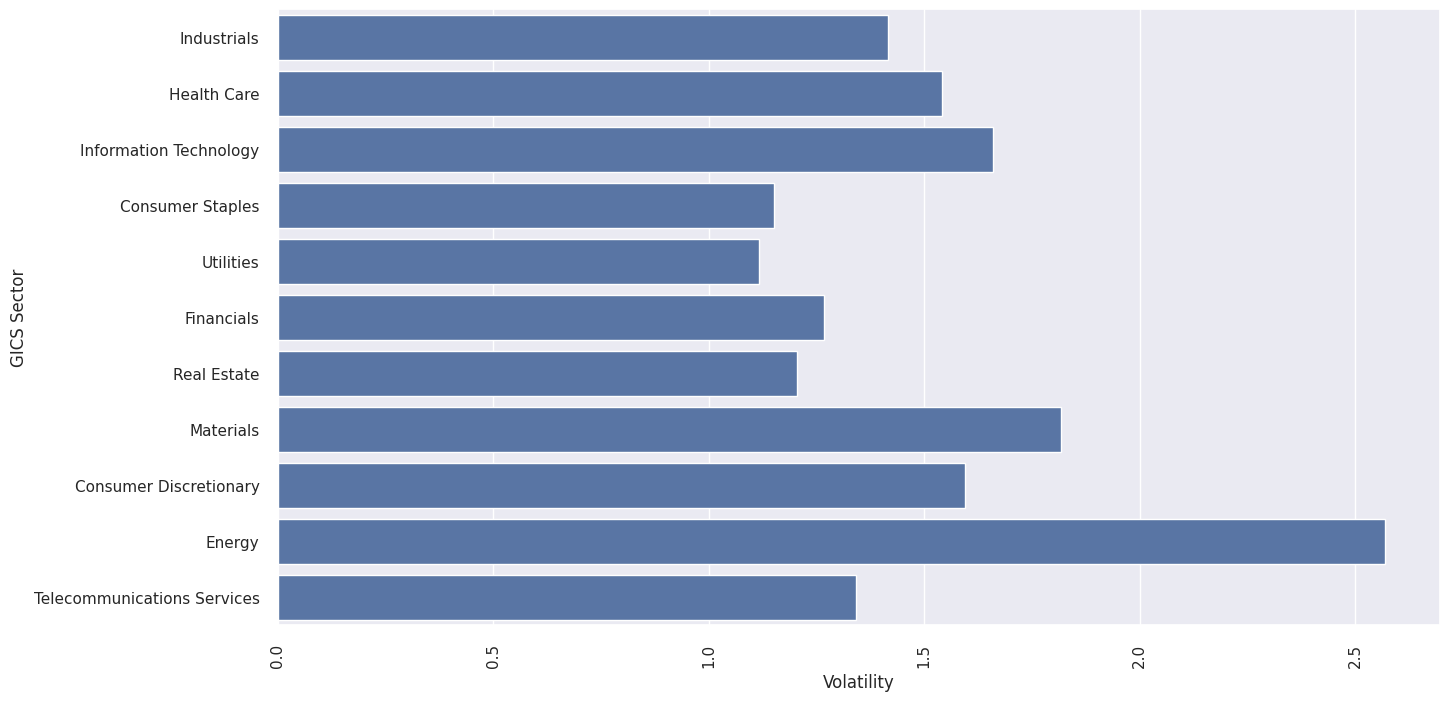

In [86]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Volatility', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

The riskiest investments stand on Energy followed by Materials and Information Technology as the have the highest volatility. Utilities have the lowest price variance and hence investments on this sector are safer.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering
- Any other preprocessing steps

There are no missing or duplicated values

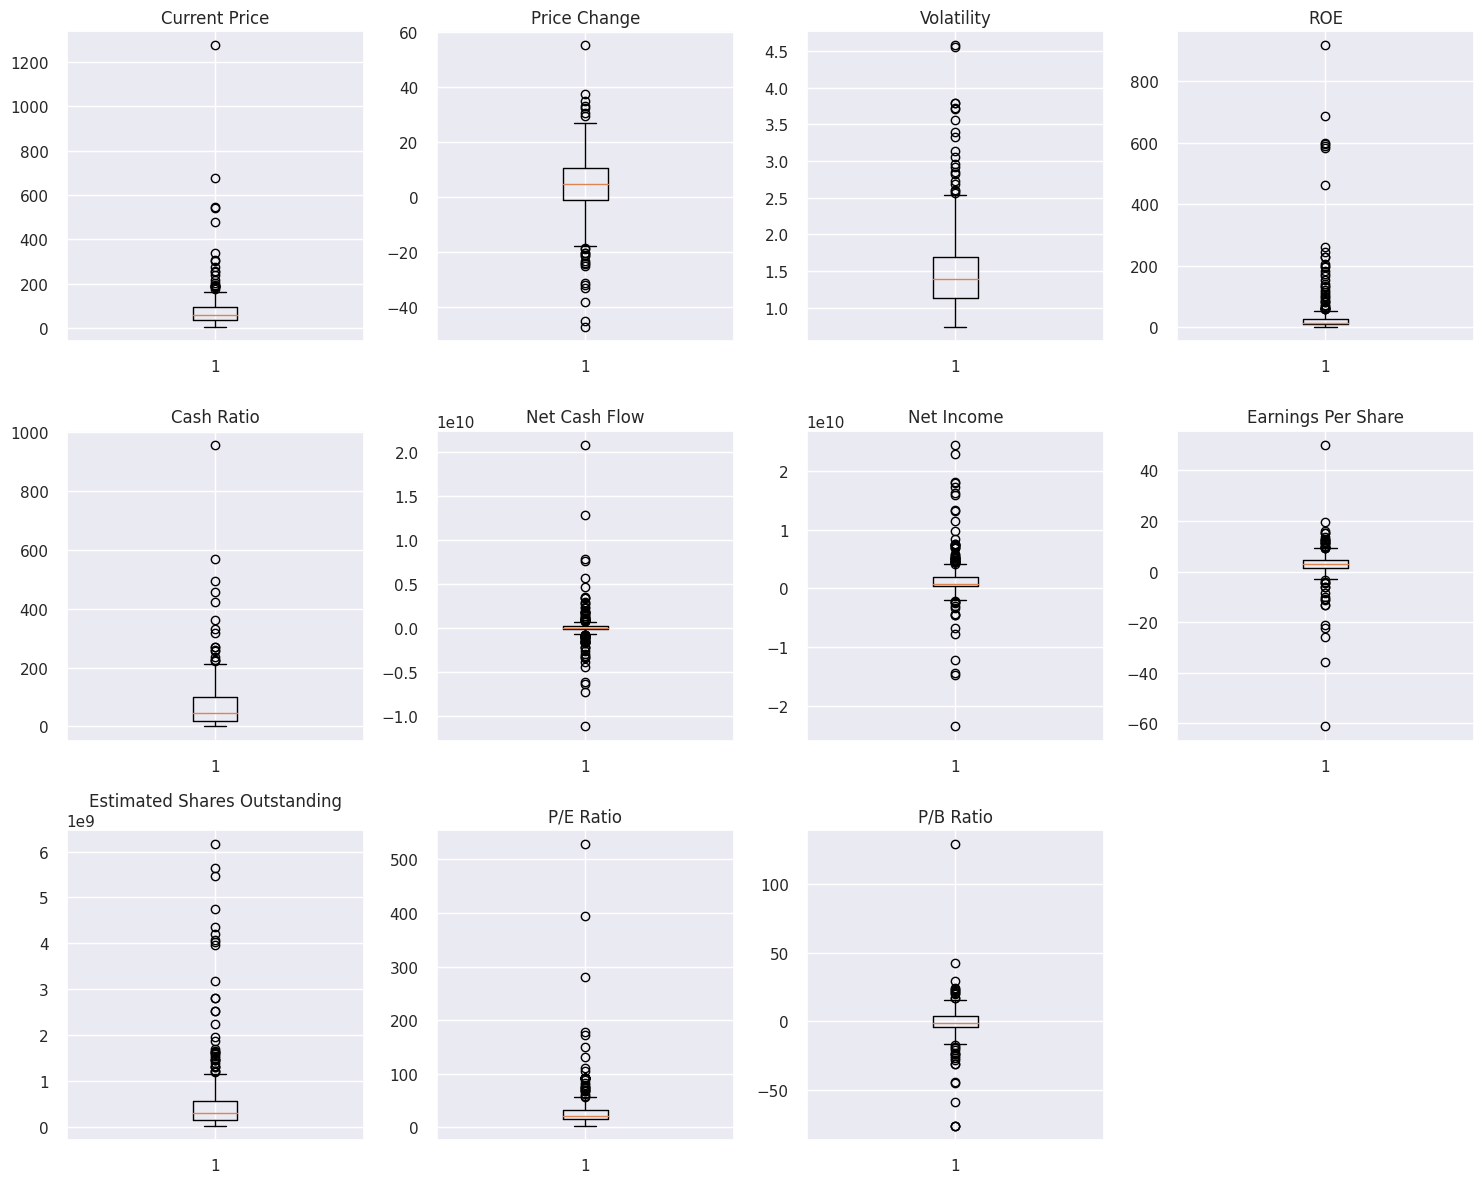

In [87]:
# Outlier check
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Every numeric variable has outliers but they will not be treated as they are most likely proper values.

# Data scaling

In [88]:
# It is essential to scale the data before we move on to clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [89]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [90]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


Numeric variables, now follow the same normal distribution.

## K-means Clustering

In the K-means clustering process, we need to figure out the number of clusters. We will start with the elbow method.

### Elbow method

In [91]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


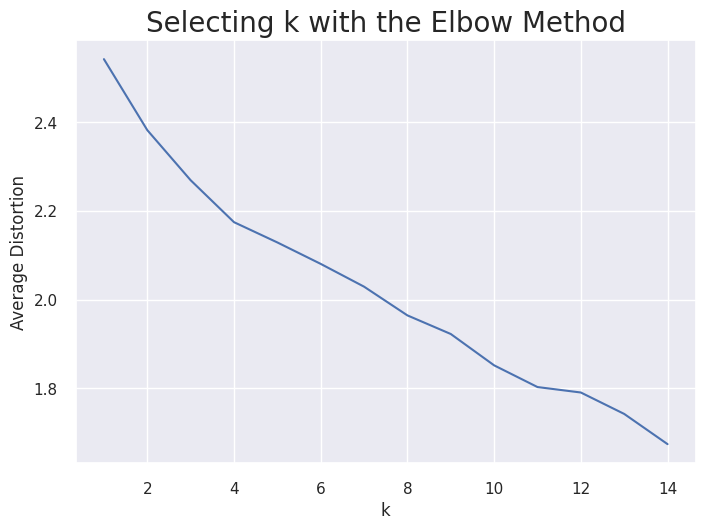

In [92]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

It is not entirely clear from this graph. The closest point to an elbow is 4.

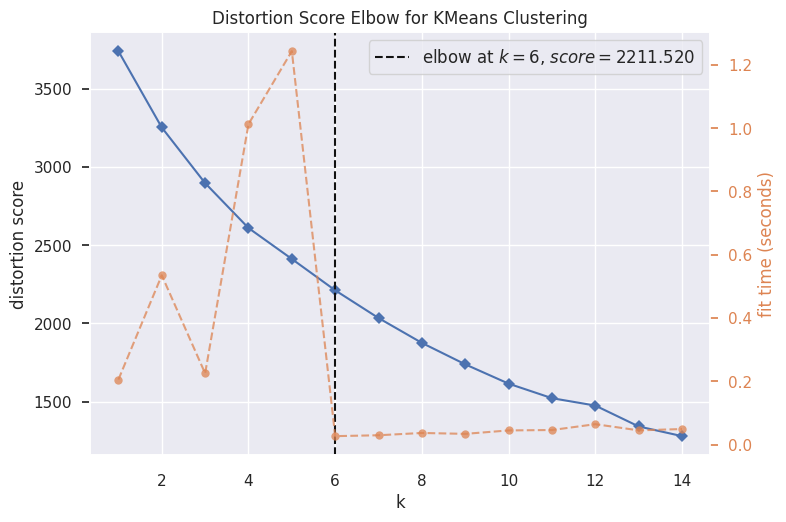

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

There is no clear optimal number of clusters according to the elbow method. Let's figure it out using the silhouette score.

### Checking the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


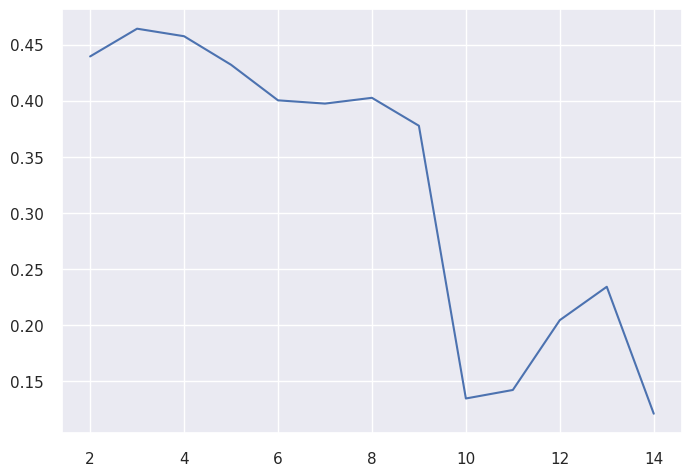

In [94]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

The 3-cluster model achieves the highest silhouette score.

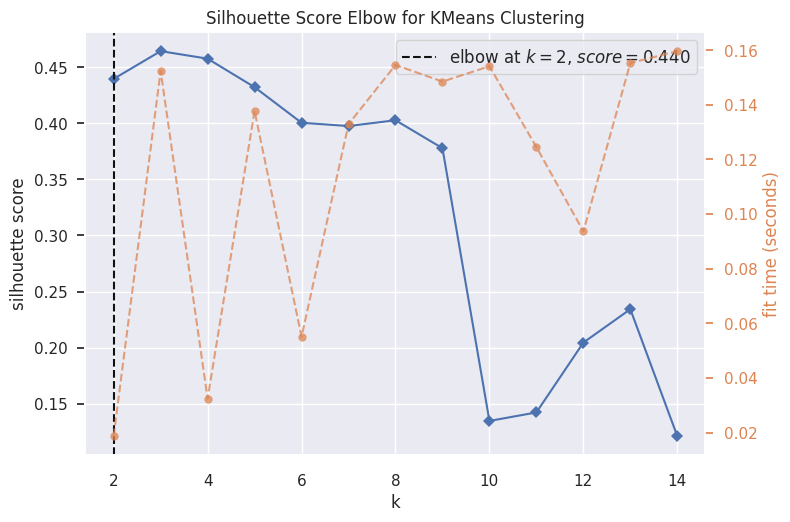

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [95]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

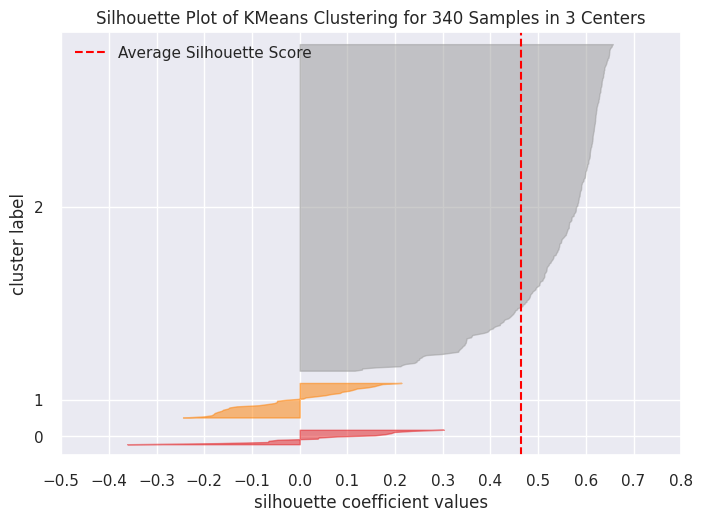

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [96]:
# finding optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

The silhouette method provided a more clear result than the elbow method. There is a huge cluster cantaining almost every element. Spliting into 4 clusters could result in a more harmonious clustering. Both solutions will be displayed. Let's create the final model for 3 clusters.

In [97]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [98]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

Cluster Profiling

In [99]:
km_cluster_profile = k_means_df.groupby("KM_segments").mean()


In [100]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [101]:
km_cluster_profile.style.highlight_max(color="green", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,-0.293323,0.225363,-0.593683,-0.139559,0.776616,0.362618,3.018134,0.150899,3.861986,-0.270027,-0.129856,14
1,-0.170348,-1.220756,2.152210,0.590570,0.007700,0.053323,-1.205889,-1.621070,-0.059873,1.777654,0.251083,32
2,0.032509,0.122140,-0.205984,-0.057634,-0.037820,-0.023071,-0.012467,0.169257,-0.177387,-0.180628,-0.021145,294


Cluster 0 has the highest current price, cash ratio, net cash flow, and estimated shares outstanding. Cluster 1 has the highest volatility, ROE, P/E ratio and P/B ratio. Cluster 3 leads at the current price, earning per share and cash in each segment.

In [102]:
# print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cate

Cluster 2 is by far the largest.

In [103]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Information Technology          2
             Telecommunications Services     2
1            Consumer Discretionary          2
             Energy                         23
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       1
2            Consumer Discretionary         37
             Consumer Staples               18
             Energy                          6
             Financials                     45
             Health Care                    36
             Industrials                    52
             Information Technology         27
             Materi

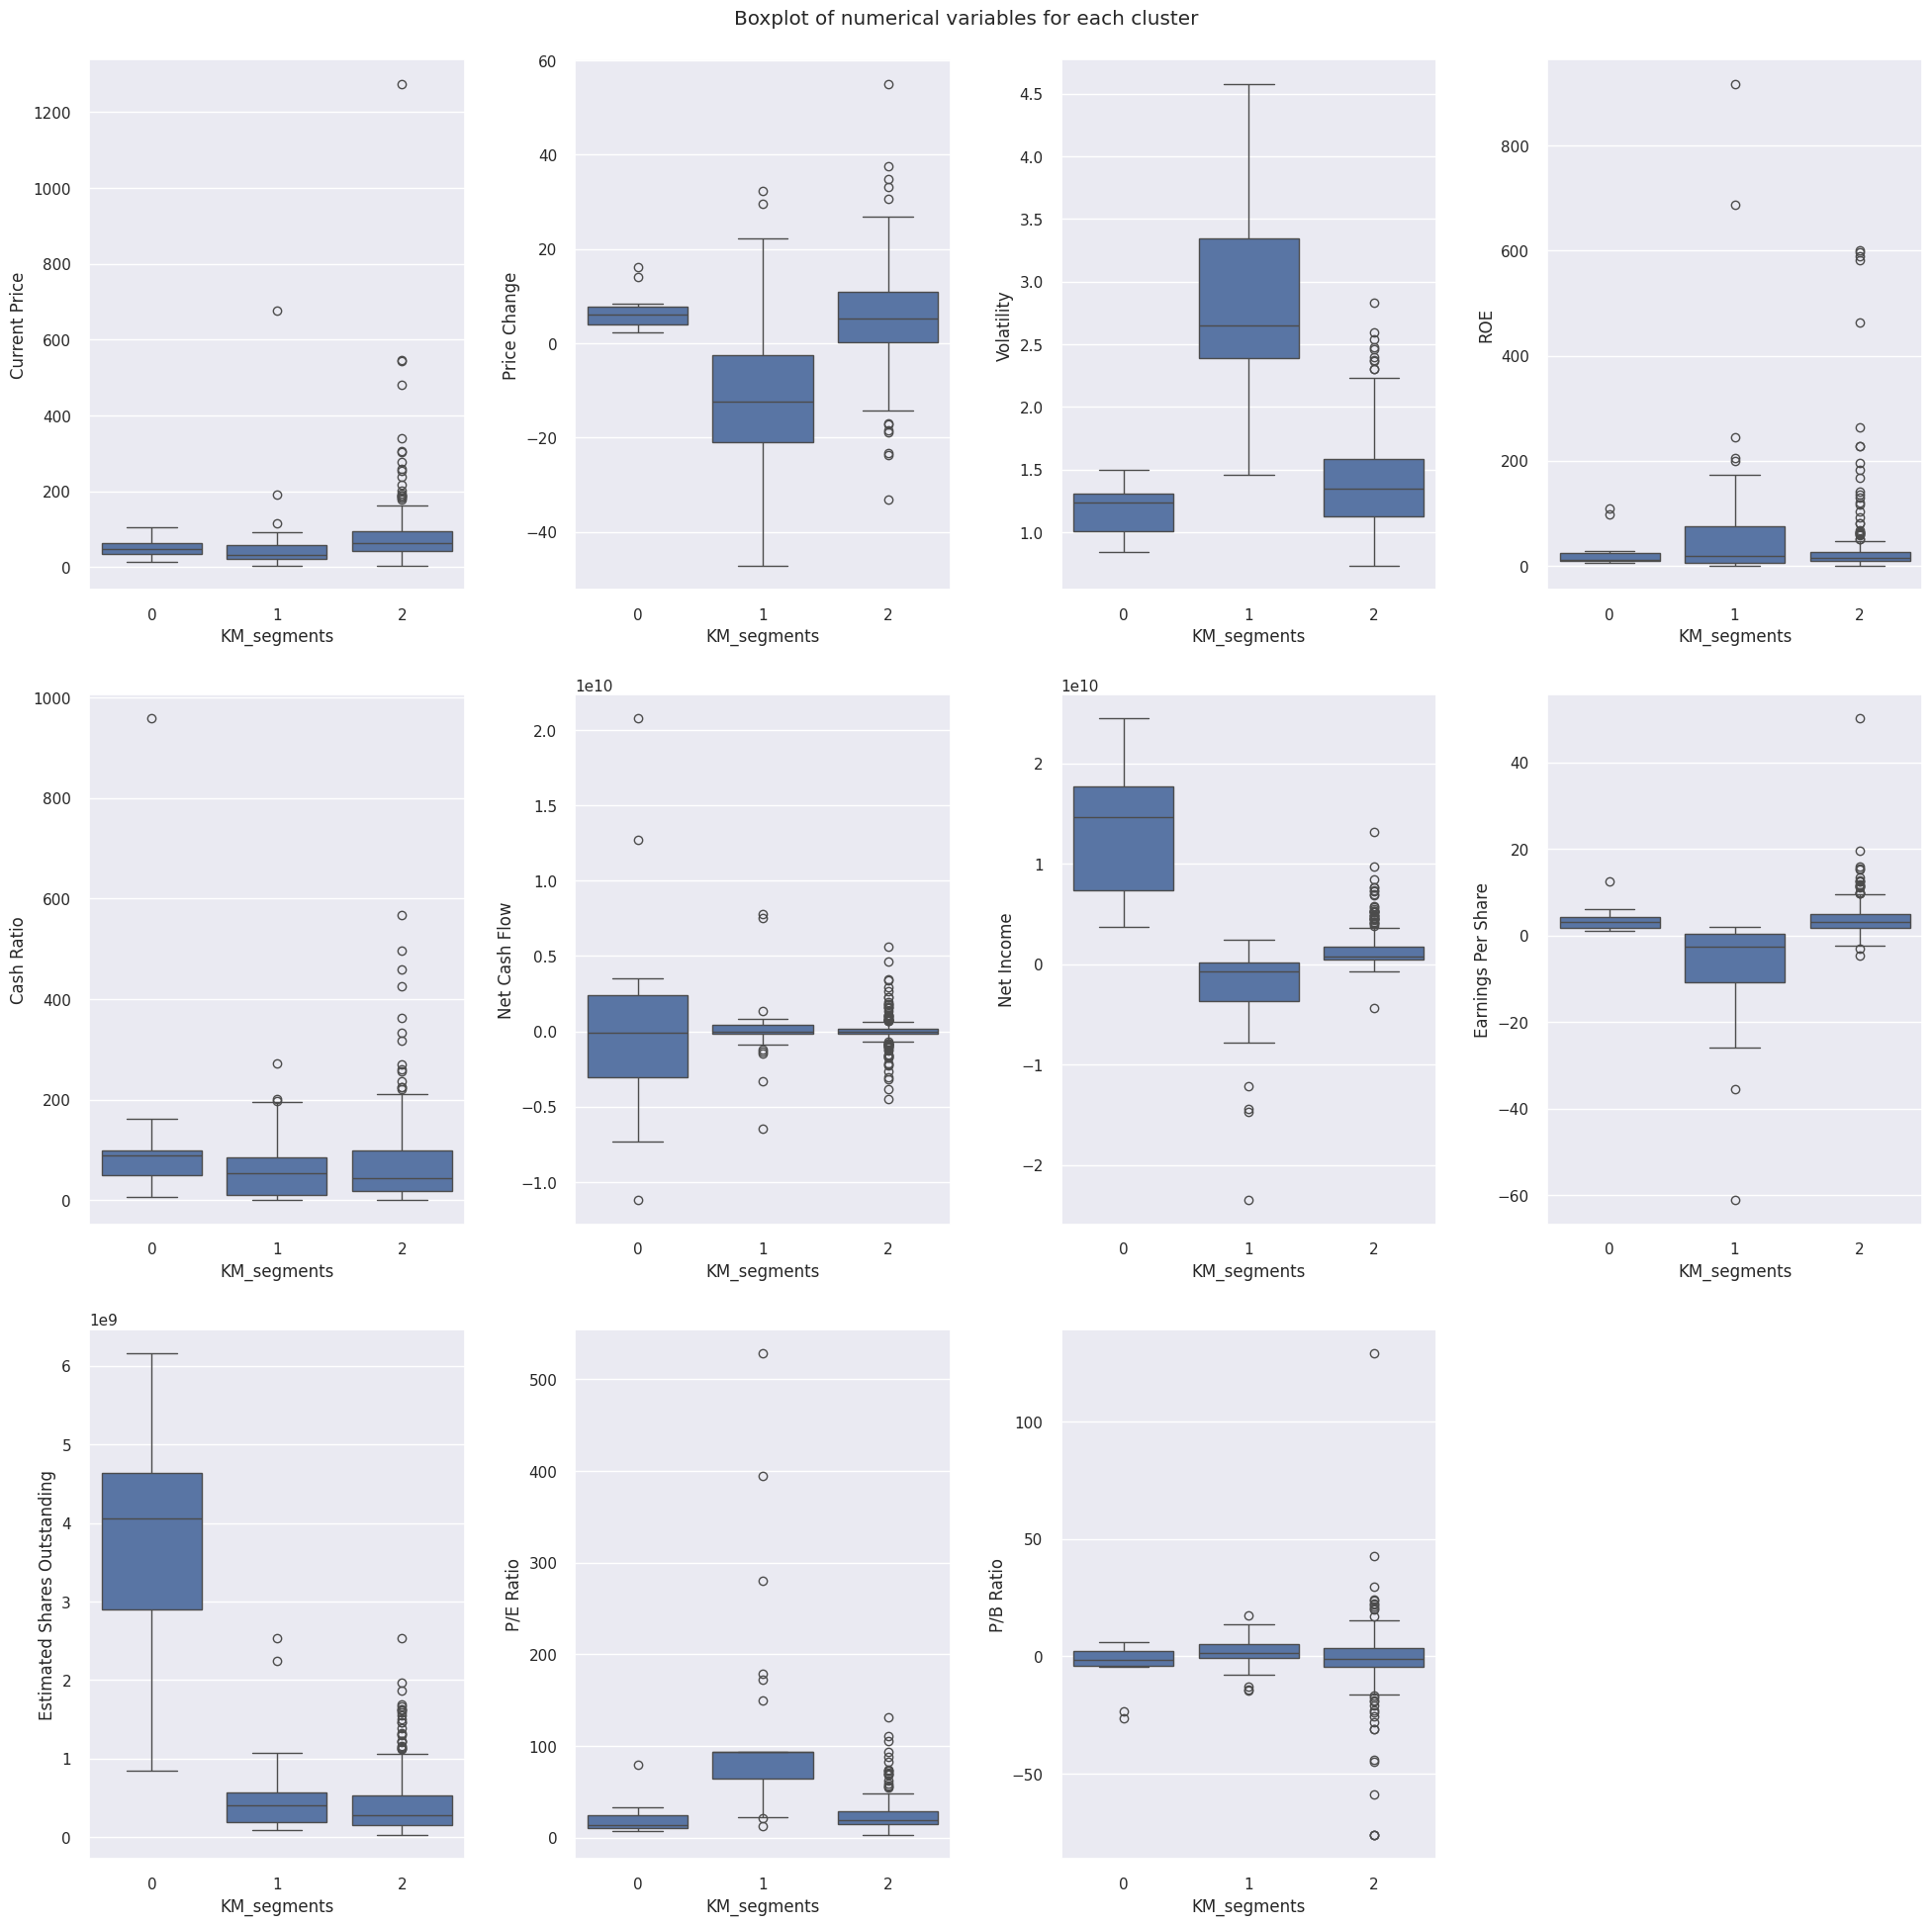

In [104]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

Cluster 2 has the most outliers in every segment. The current price is more or less the same in each cluster. Cluster 1 has a negative price change while 0 and 2 are positive on similar levels. Cluster 1 has the highest volatility (median=2,7) while 0 and 2 have laid on 1,3 and 1,4  median respectively. ROE is similar in each cluster with cluster 1 having higher variance. Cluster 0 has slightly more cash ratio than the others on average. Net cash flow is more or less the same on each cluster with cluster 0 having a bigger variance. Cluster 0 has the highest net income followed by 2 and 1 respectively. Clusters 0 and 2 have the same earnings per share with cluster 1 having slightly less on average with bigger variance. Cluster 0 has more than 4 earning shares ontstanding while the others have less than 1 on average. Cluster 1 has the highest P/E ratio with the others being similar. P/B ratio is similar to each cluster with cluster 1 being slightly above 0 while others are slightly less than 0.



## **Insights**

Cluster 0: The Stable Performers

Characteristics: This cluster seems to be characterized by a relatively stable price with a moderate price change, lower volatility, and a higher cash ratio on average. The significant variance in net cash flow coupled with the highest net income suggests these might be companies with strong financials but perhaps with varied investment or operational strategies leading to different cash flow patterns. The high number of earnings per share outstanding indicates that these could be larger or more established companies.
Implications: Investors looking for stability and possibly income (given the strong net income figures) might find this cluster appealing. The companies here could be considered "safe bets" for those averse to high risk.

Cluster 1: The Volatile High-Risk, High-Reward

Characteristics: Exhibiting the highest volatility and a negative price change indicates this cluster represents more risky investments. The higher variance in ROE and earnings per share, along with the highest P/E ratio, suggests these companies could be in growth phases or sectors, experiencing both higher potential returns and risks.
Implications: Suitable for investors with a higher risk tolerance aiming for substantial growth. The negative price change might concern some, but for the long-term investor, it could present a buying opportunity if the belief is that the volatility is temporary.

Cluster 2: The Balanced, Diversified Potential

Characteristics: With positive price changes similar to Cluster 0 and a volatility level on the lower end, coupled with being the cluster with the most outliers in every segment, this group might represent a diverse set of companies. These attributes suggest a balance of growth and stability, yet the presence of numerous outliers implies significant diversity within the cluster itself.
Implications: This cluster might offer a good mix for investors looking for a balanced approach, combining growth and stability. However, due diligence is advisable given the diversity and outliers within this cluster, indicating not all investments within may align neatly with an individual's risk profile.

General Insights:

The similarity of current prices across clusters does not significantly differentiate them, highlighting the importance of looking beyond just price when evaluating stocks.
The close P/B ratios across clusters suggest that regardless of the cluster, the companies might be reasonably valued in terms of their book value, making none of the clusters universally "cheap" or "expensive" on this metric alone.
Investors might use the variance within clusters, especially in financial metrics like ROE, net cash flow, and earnings per share, to identify specific companies that stand out within each cluster for further analysis.

Recommendations:

For risk-averse investors, focusing on Cluster 0 could provide a stable investment with potential for income through dividends (suggested by high net income).
For those seeking growth, Cluster 1 presents opportunities, albeit with higher risk due to its volatility and negative price change.
Investors aiming for a balanced portfolio might look to Cluster 2 for diversification, paying close attention to outliers which could present unique opportunities or risks.
Across all clusters, analyzing outliers in more detail could uncover hidden opportunities or potential red flags not immediately apparent from cluster averages.

Leveraging these insights, investors can tailor their portfolio strategies to align with their risk tolerance, investment goals, and the unique opportunities presented within each cluster.

## Hierarchical Clustering

### Cophenetic correlation

In [105]:
# taking a copy of the dataset in order to edit it freely
hc_df = subset_scaled_df.copy()

In [106]:
# Several distances and linkage methods will be compared

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

Euclidean distance performs better on this dataset among single and average linkage. Let's check Euclidean distance with different linkage methods.

In [107]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


Average is still the best linkage method for this dataset as this method gets the highest cophenetic correlation with Euclidean distance.

### Dendograms

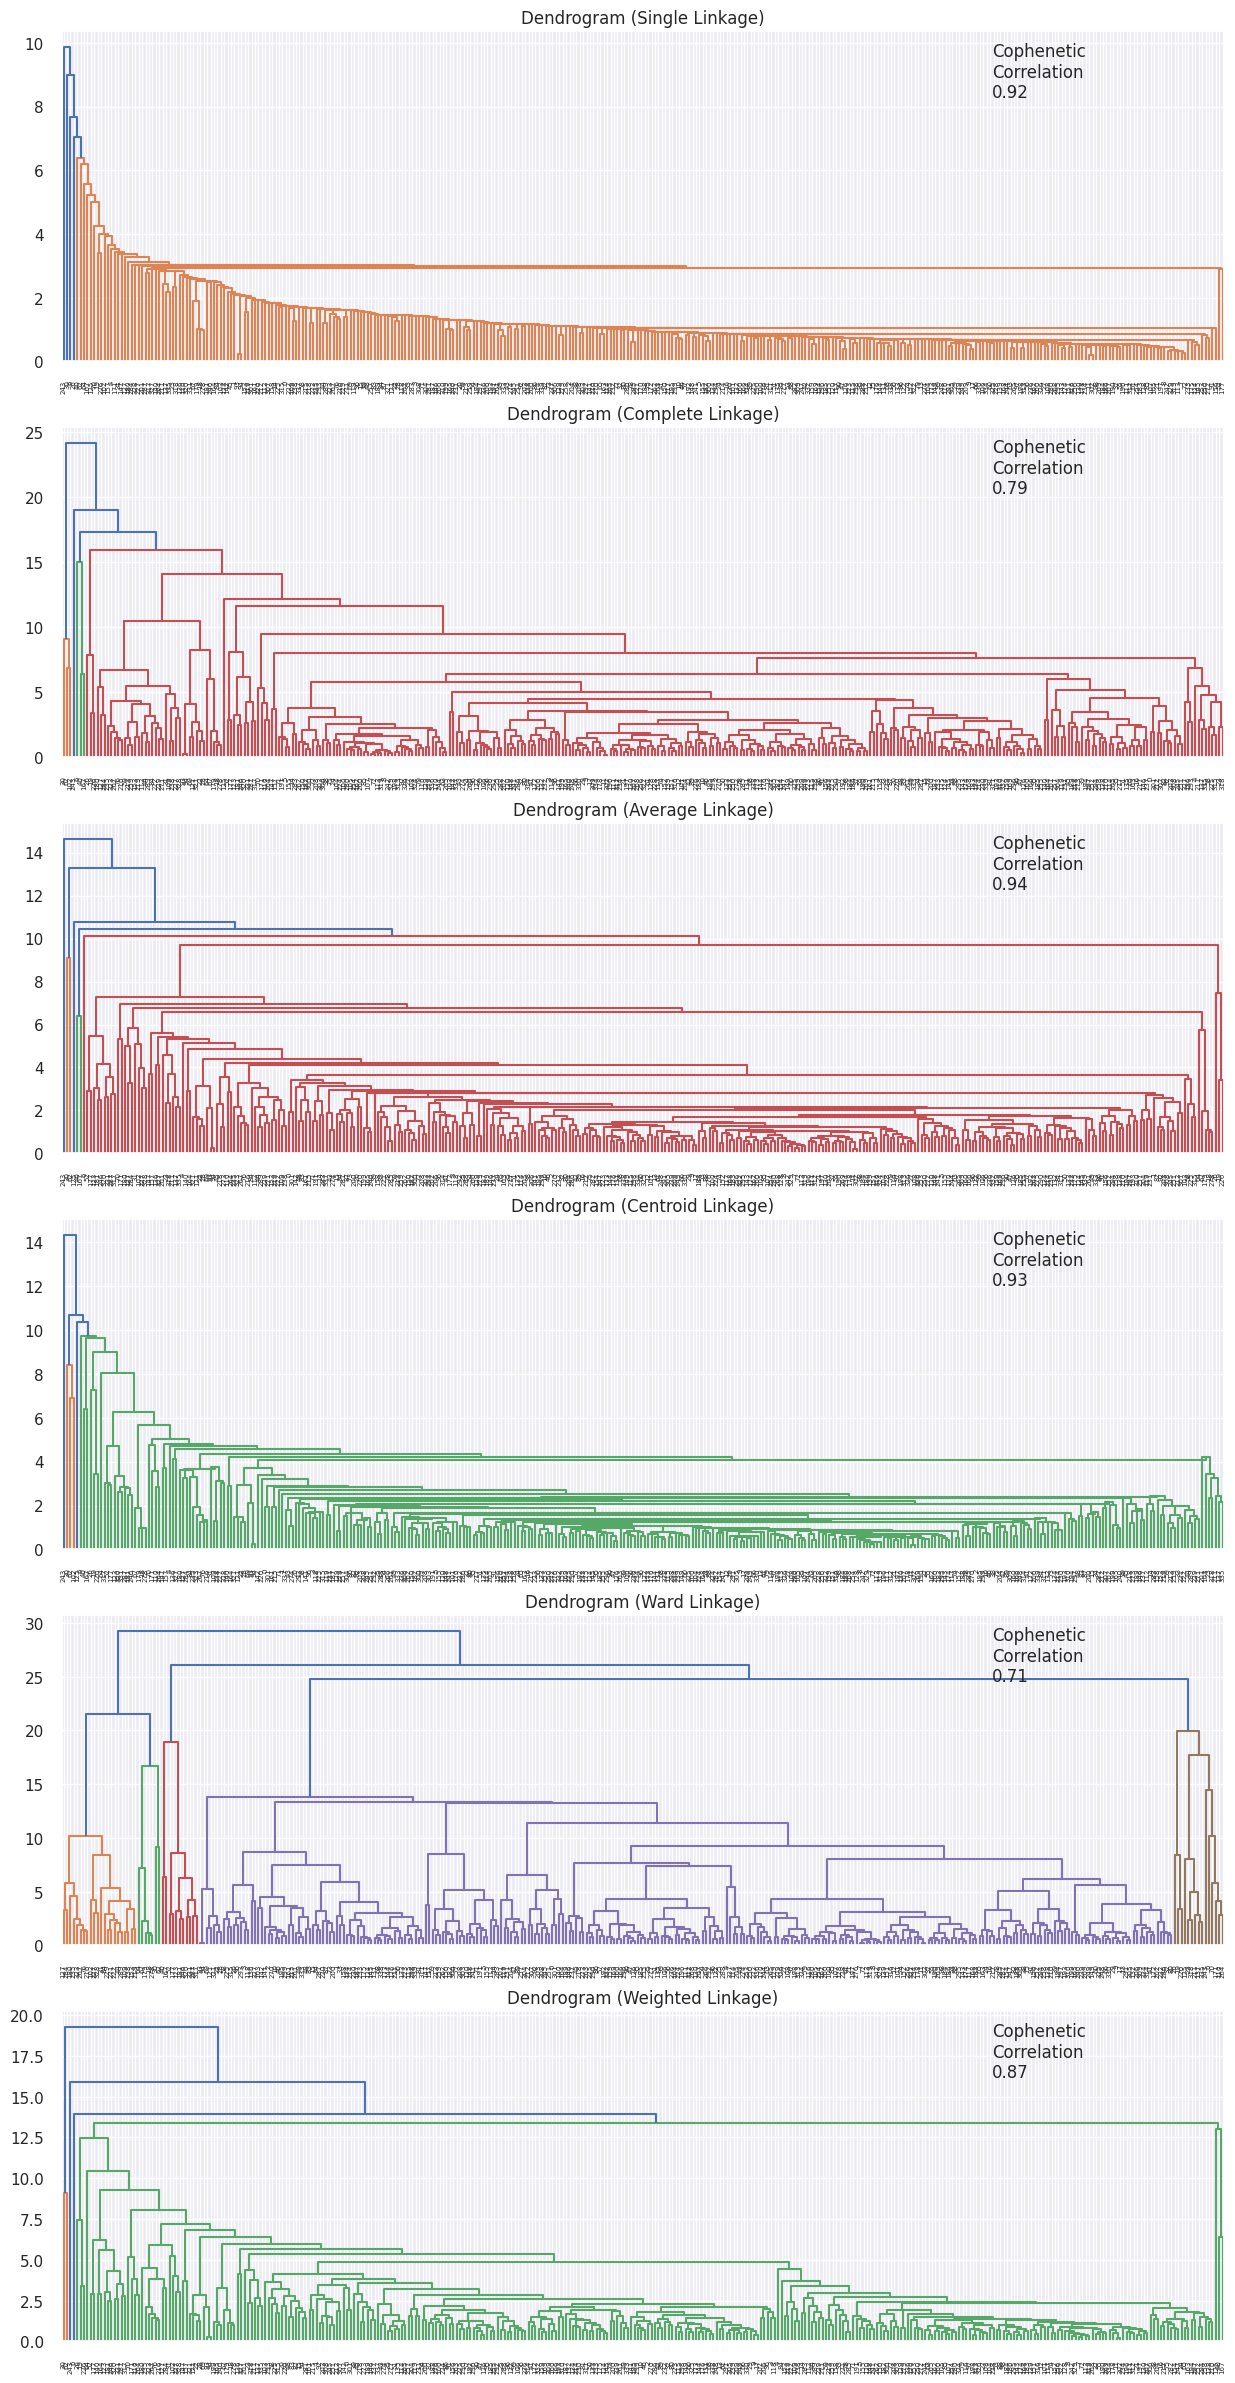

In [108]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**observations**

 The cophenetic correlation is highest for the average linkage method followed by centroid and single linkage methods with minimal difference between them.


  In making a decision, we consider the following points:

Interpretability and Usability:  the centroid and single linkage offer a clear indication that four clusters are optimal and this number of clusters is interpretable and actionable for our specific analysis or business case, it may be the preferred choice. The ease of interpretation and the ability to justify the number of clusters is often more important for practical applications than a slight difference in statistical metrics.


Alignment with Objectives: We consider which method aligns better with your objectives, including how we plan to use the clusters. If a clear distinction between clusters (as seen with single and centroid linkage) helps meet our project's goals or answers our specific research questions more effectively, lean towards that method.


Validation: If possible, validate the chosen number of clusters through additional metrics or domain-specific knowledge. For instance, silhouette scores could provide further insight into the cohesion and separation of the chosen clusters. If applicable, domain expertise can also guide the decision, especially if a certain number of clusters make more sense from a practical standpoint.


In summary, all linkage methods have their merits based on the cophenetic correlation, the clearer choice in terms of interpretability and the decision-making process might be the single linkage with 3 clusters. This approach offers a practical advantage, making it easier to communicate and act upon our findings.

This method though results in a huge cluster and 2 tiny clusters. We will do ward linkage with 4 clusters later. Sacriphising some pophenetic coeficient score in order to get a more proper split.

In [109]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


### Creating the final model

In [128]:
HCmodel = AgglomerativeClustering(n_clusters= 3, affinity='euclidean', linkage='single')
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [111]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster profiling

In [112]:
hc_cluster_profile = hc_df.groupby("HC_segments").mean()

In [113]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values)

In [114]:
hc_cluster_profile.style.highlight_max(color="green", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,-0.034982,-0.001587,-0.003113,-0.026601,-0.004062,0.001651,0.018022,0.007495,0.002517,-0.003562,-0.001560,338
1,12.195670,-0.074042,-0.435986,-0.109922,1.262362,-0.888563,0.268653,7.192572,-0.622886,-0.161672,0.047742,1
2,-0.371689,0.610544,1.488223,9.101176,0.110496,0.330570,-6.359977,-9.725729,-0.228017,1.365673,0.479628,1


Cluster 0 has by far the biggest count in each segment and the only positive estimated shares outstanding. Cluster 1 has the highest current price, cash ratio, net income and earnings per share. Cluster 2 is leading in every other variable. Although it is unusual to have almost every company in one cluster, the other two clusters are significantly different than anything else in every column and also k-means gave us similar results. Hence, we will consider this result normal for our case.

In [115]:
# print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [116]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         29
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         33
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          1
Name: Security, dtype: int64

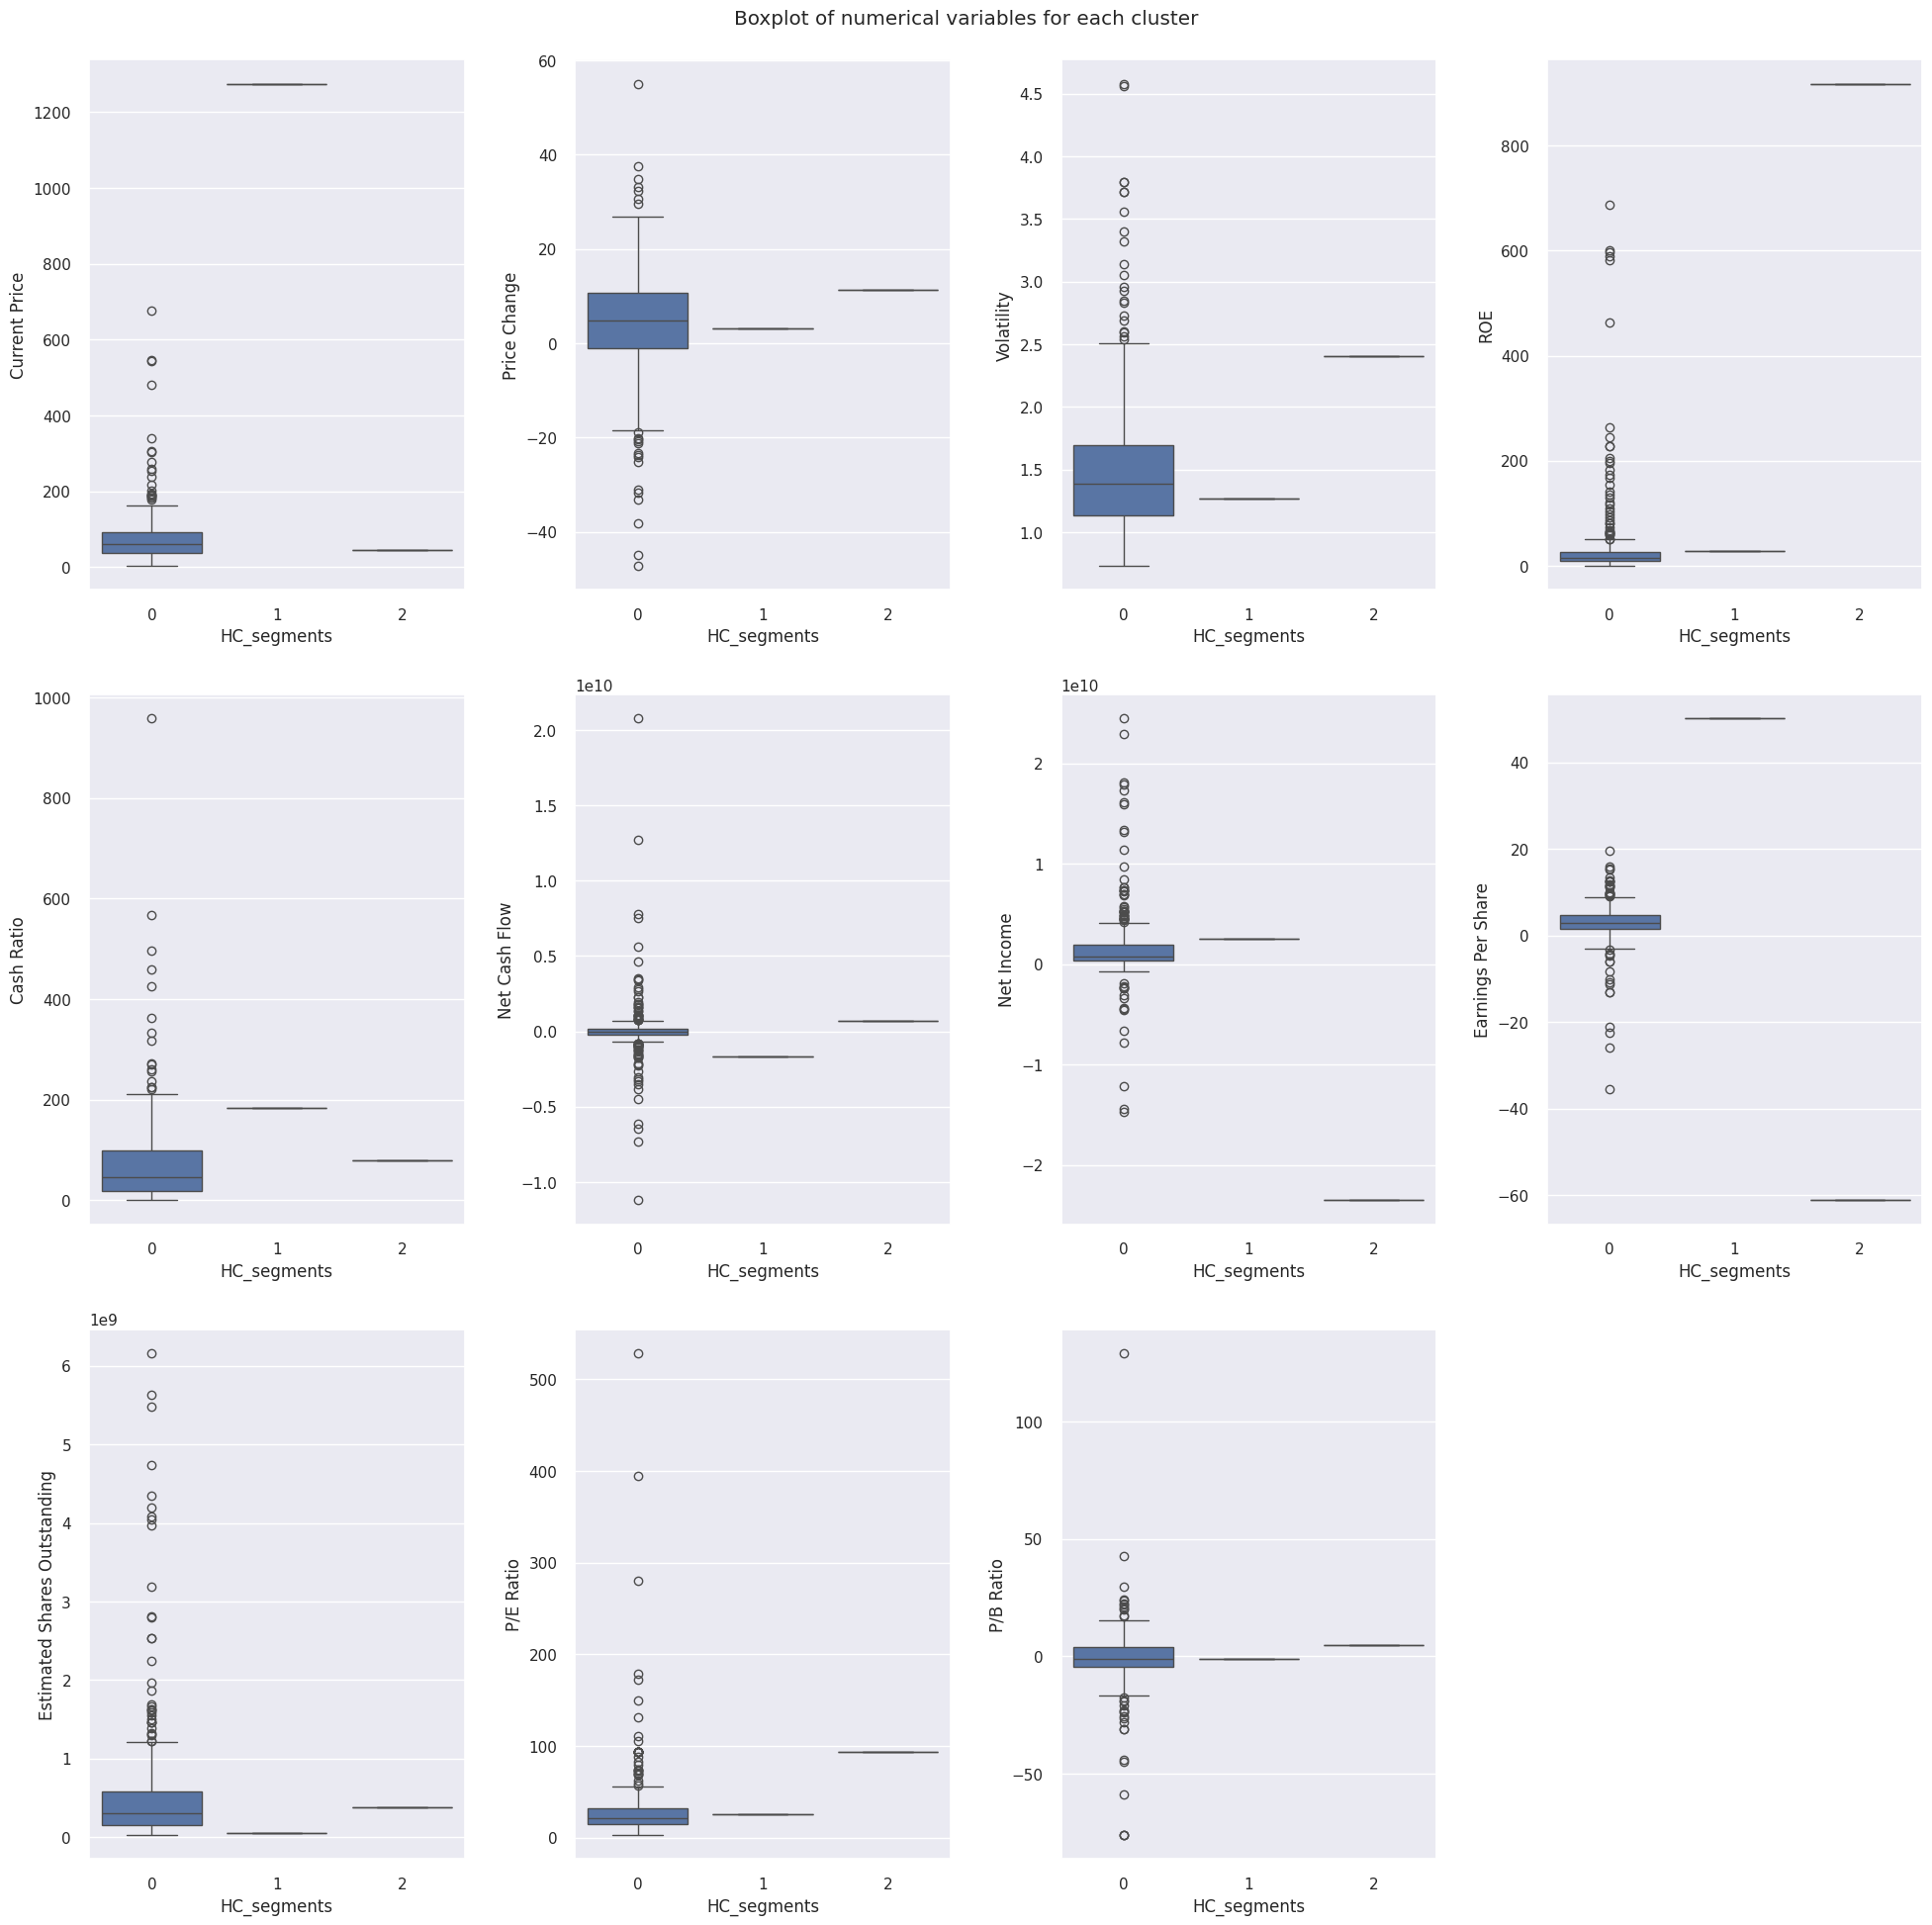

In [117]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

As we already observed from the previous table. Cluster 1 has by far the biggest current price with the others being similar. Cluster 2 has the biggest price change and volatility with the others being similar. Cluster 2 has a huge ROE while others are slightly above 0. Cluster 1 has the highest cash ratio followed by clusters 2 and 0 respectively. Cluster 2 has the highest cash flow followed by clusters 0 and 1 respectively. Net income is  slightly bigger in cluster 1 than cluster 0, while cluster 2 has less than -2 on average. Cluster 1 has more than 50 earnings per share while cluster 0 is close to 0 and cluster 2 has less than -60 on average. Estimated shares outstanding is similar in each cluster with cluster 2 having the most,  followed by clusters 0 and 1 respectively. Cluster 2 has the highest P/E and P/B ratio with the others laying on similar levels. Obviously cluster 0 has the most outliers as the biggest cluster.

### Insights

**Cluster Characteristics Overview**

Cluster 1: High-Value, Stable, and Profitable Entities

High Current Price: Companies in this cluster have significantly higher stock prices compared to the others, possibly indicating established, large-cap companies with solid market presence.
Moderate to High Cash Ratio: Indicates a strong liquidity position, suggesting these companies can cover their short-term liabilities more effectively than others.
High Net Income and Earnings Per Share (EPS): Signifies profitable operations and financial health, likely making them attractive for conservative investors looking for steady returns and lower risk.
Similar Number of Shares Outstanding as Others, But Higher Valuation Metrics: Despite having a similar count of shares to other clusters, their high EPS and stock price reflect their quality and investors' confidence in them.

Cluster 2: High Growth Potential but Higher Risk

Biggest Price Change and Volatility: Indicates a high-risk, high-reward profile, possibly representing growth-oriented companies or those in sectors experiencing rapid changes.
Huge ROE but Negative Net Income: A high Return on Equity (ROE) alongside a significantly negative net income could indicate recent investments or expenses that have yet to yield profits, typical of growth sectors like technology or biotech.
High Cash Flow with High P/E and P/B Ratios: Suggests expectations of future growth are high among investors, making these stocks potentially overvalued or reflective of growth potential.
Negative EPS on Average: Reflects current unprofitability, a common trait among companies investing heavily in future growth.

Cluster 0: The Residual Group with Mixed Characteristics

Most Companies and Outliers: This cluster acts as a catch-all for companies that don't fit the extreme characteristics of clusters 1 and 2. Its members may range from moderately successful to struggling entities, hence the presence of outliers.
Lower but Similar Valuations and Financial Metrics as Cluster 1: Indicates these companies might be in various stages of development or in industries with lower margins, making them potentially undervalued or simply stable without the growth prospects of Cluster 2.

**Implications and Strategic Insights**

Investment Diversification: Investors or firms could use these clusters to balance their portfolio, combining the stability and reliability of Cluster 1 companies with the growth potential of Cluster 2, while using Cluster 0 for potential undervalued picks.
Risk Management: Understanding the volatility and risk profile of each cluster helps in tailoring investment strategies to risk tolerance. Cluster 2, while offering growth, carries significant risk, which needs careful management.
Sector Analysis: Further analyzing the sectors these clusters belong to can provide insights into industry health, growth prospects, and potential future market leaders or laggards.
Financial Health Monitoring: Clusters 1 and 2 provide contrasting insights into financial health and strategy; companies in Cluster 1 are financially healthy now, while those in Cluster 2 are potentially gearing up for significant future growth, albeit with current losses.

**Conclusion**

The distinct characteristics of each cluster revealed by your analysis afford actionable insights for investors, analysts, and businesses aiming to understand market dynamics, identify investment opportunities, and manage risks effectively. The key is to align these insights with individual or organizational objectives, risk tolerance, and investment horizon.

## K-means vs Hierarchical Clustering

**Technique comparison**

*   K-means took less time for execution

*   Hierarchical clustering provides much cleaner clusters as they have bigger differences in each variable


*   K-means vs HC Cluster Comparison:


K-means Cluster 0 (The Stable Performers) could be similar to HC Cluster 1 (High-Value, Stable, and Profitable Entities) due to both clusters describing entities with stable performances, higher cash ratios, and significant net incomes, suggesting these are established companies with strong financials.


K-means Cluster 1 (The Volatile High-Risk, High-Reward) aligns with HC Cluster 2 (High Growth Potential but Higher Risk) because both clusters represent companies characterized by high volatility and potential for high growth, accompanied by higher risks and negative net income in some cases.


K-means Cluster 2 (The Balanced, Diversified Potential) seems to correspond to HC Cluster 0 (The Residual Group with Mixed Characteristics) as they both encompass a mix of growth and stability, with mentions of outliers suggesting diversity within the clusters.


*   We obtained 3 clusters in both cases, PCA is not needed

In conclusion, the high number of observations consistently grouped in both K-means and HC indicates a strong agreement between the methods in identifying the underlying structures or patterns within the data.








## Actionable Insights and Recommendations

**Actionable Insights:**


Consistency Across Methods Validates Clustering: The strong agreement in cluster formations between K-means and HC supports the robustness and reliability of the identified clusters. Stakeholders can have increased confidence in these segments as a foundation for strategic decisions.


Efficiency vs. Clarity in Clustering Techniques:

K-means offers a quicker, more scalable approach to clustering, beneficial for high-volume data analyses or scenarios requiring faster turnarounds.
HC provides more distinct cluster delineations, beneficial for deep-dives into specific sectors or when precision in cluster identification is critical for strategy development.



Cluster-Specific Strategies:

The Stable Performers/High-Value, Stable, and Profitable Entities: Ideal for conservative investment portfolios or companies seeking stable, reliable business partners. Focus strategies on leveraging the financial strength and market stability of these entities.
The Volatile High-Risk, High-Reward/High Growth Potential but Higher Risk: These clusters offer opportunities for aggressive growth strategies or speculative investments. Stakeholders should weigh the higher risk against potential rewards, possibly allocating a portion of their portfolio to these prospects for diversification.
The Balanced, Diversified Potential/The Residual Group with Mixed Characteristics: Represents a spectrum of opportunities from moderate risk/growth to stable but innovative entities. Strategies here can focus on a balanced investment approach or identifying undervalued companies poised for growth.

**Recommendations:**

Strategic Decisions:

Targeted M&A Opportunities: Identifying companies within the "High Growth Potential but Higher Risk" clusters can pinpoint potential targets for mergers and acquisitions, especially for a company looking to expand its portfolio into new, innovative sectors with high growth prospects.


Partnership Development: Companies in the "Stable Performers" or "High-Value, Stable, and Profitable Entities" clusters can be ideal candidates for strategic partnerships or long-term contracts, offering a balance of reliability and financial stability that can support steady growth.


Operational Improvements:


R&D Investment: Insights from the "Volatile High-Risk, High-Reward" cluster can help the company identify areas where increased R&D investments could lead to significant advancements and potential future profitability, thus staying competitive in fast-evolving industries.


Risk Management: By understanding the characteristics and performance of companies within each cluster, the company can better manage its risk profile, adapting its operational strategies to mitigate potential losses from high-volatility sectors while capitalizing on the stability offered by firms in more established markets.


Investment Strategies:


Portfolio Diversification: Utilizing cluster analysis, the company can diversify its investment portfolio by allocating resources across different clusters, thereby balancing risk and ensuring growth from high-potential areas while maintaining a stable base of income-generating investments.


Dynamic Investment Reassessment: The company should adopt a dynamic approach to its investment strategies, using ongoing clustering analysis to reassess and realign investments based on shifting market dynamics and the evolving characteristics of cluster members.


Engaging Stakeholders:


Investor Relations: Use clustering insights to communicate investment strategies and market positioning to investors, highlighting how the company leverages data-driven analysis to inform decisions and mitigate risks.


Marketing and Sales Optimization: Insights from clustering can inform targeted marketing and sales strategies, focusing efforts on sectors represented by the "Balanced, Diversified Potential" cluster to maximize ROI on marketing spend.


Product Development and Innovation: For companies identified within or aligned with the "High Growth Potential but Higher Risk" cluster, focus on product innovation and development could capture market share in emerging sectors.


Recommendations for Implementing Insights:


Competitive Analysis Tool: Regularly perform clustering analysis as a competitive analysis tool, staying ahead of market trends and adjusting strategies accordingly.


Internal Skill Development: Invest in analytics and data science capabilities to continuously refine clustering techniques and adapt to new data sources, enhancing strategic agility.


Ethical and Sustainable Growth: Align cluster-based strategies with ethical considerations and sustainability goals, ensuring long-term viability and positive brand image.


By systematically applying these insights and recommendations across strategic planning, operational improvements, and investment strategies, the company can navigate market complexities, capitalize on emerging opportunities, and sustain competitive advantages in a rapidly changing business landscape.



# **4 clusters solution**

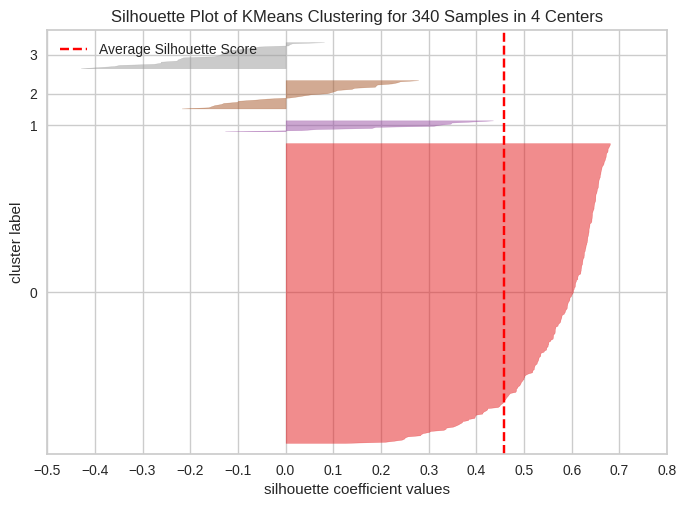

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

This split seams more valuable.

In [48]:
# final K-means model
kmeans4 = KMeans(n_clusters=4, random_state=1)
kmeans4.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [118]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans4.labels_
df1["KM_segments"] = kmeans4.labels_

### Cluster profiling

In [119]:
km_cluster_profile = k_means_df.groupby("KM_segments").mean()

In [121]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [123]:
km_cluster_profile.style.highlight_max(color="green", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,-0.086438,0.082414,-0.232951,-0.051617,-0.188546,-0.035803,-0.003094,0.128361,-0.163976,-0.198018,-0.117644,277
1,-0.309926,0.139248,-0.669418,-0.088233,0.065186,-0.580298,3.390319,0.209466,4.406556,-0.402159,-0.203198,11
2,-0.436756,-1.622242,2.342968,0.699929,-0.221363,-0.110608,-1.367911,-1.862300,-0.114408,1.309894,0.219435,27
3,1.565799,0.777609,0.345241,-0.145189,2.299485,0.771489,0.019883,0.496883,0.001525,0.956300,1.155908,25


Even though cluster 0 has the highest count in each segment it is the only measure this cluster is excelling.

In [124]:
# print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

Cluster 0 is the largest

In [125]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

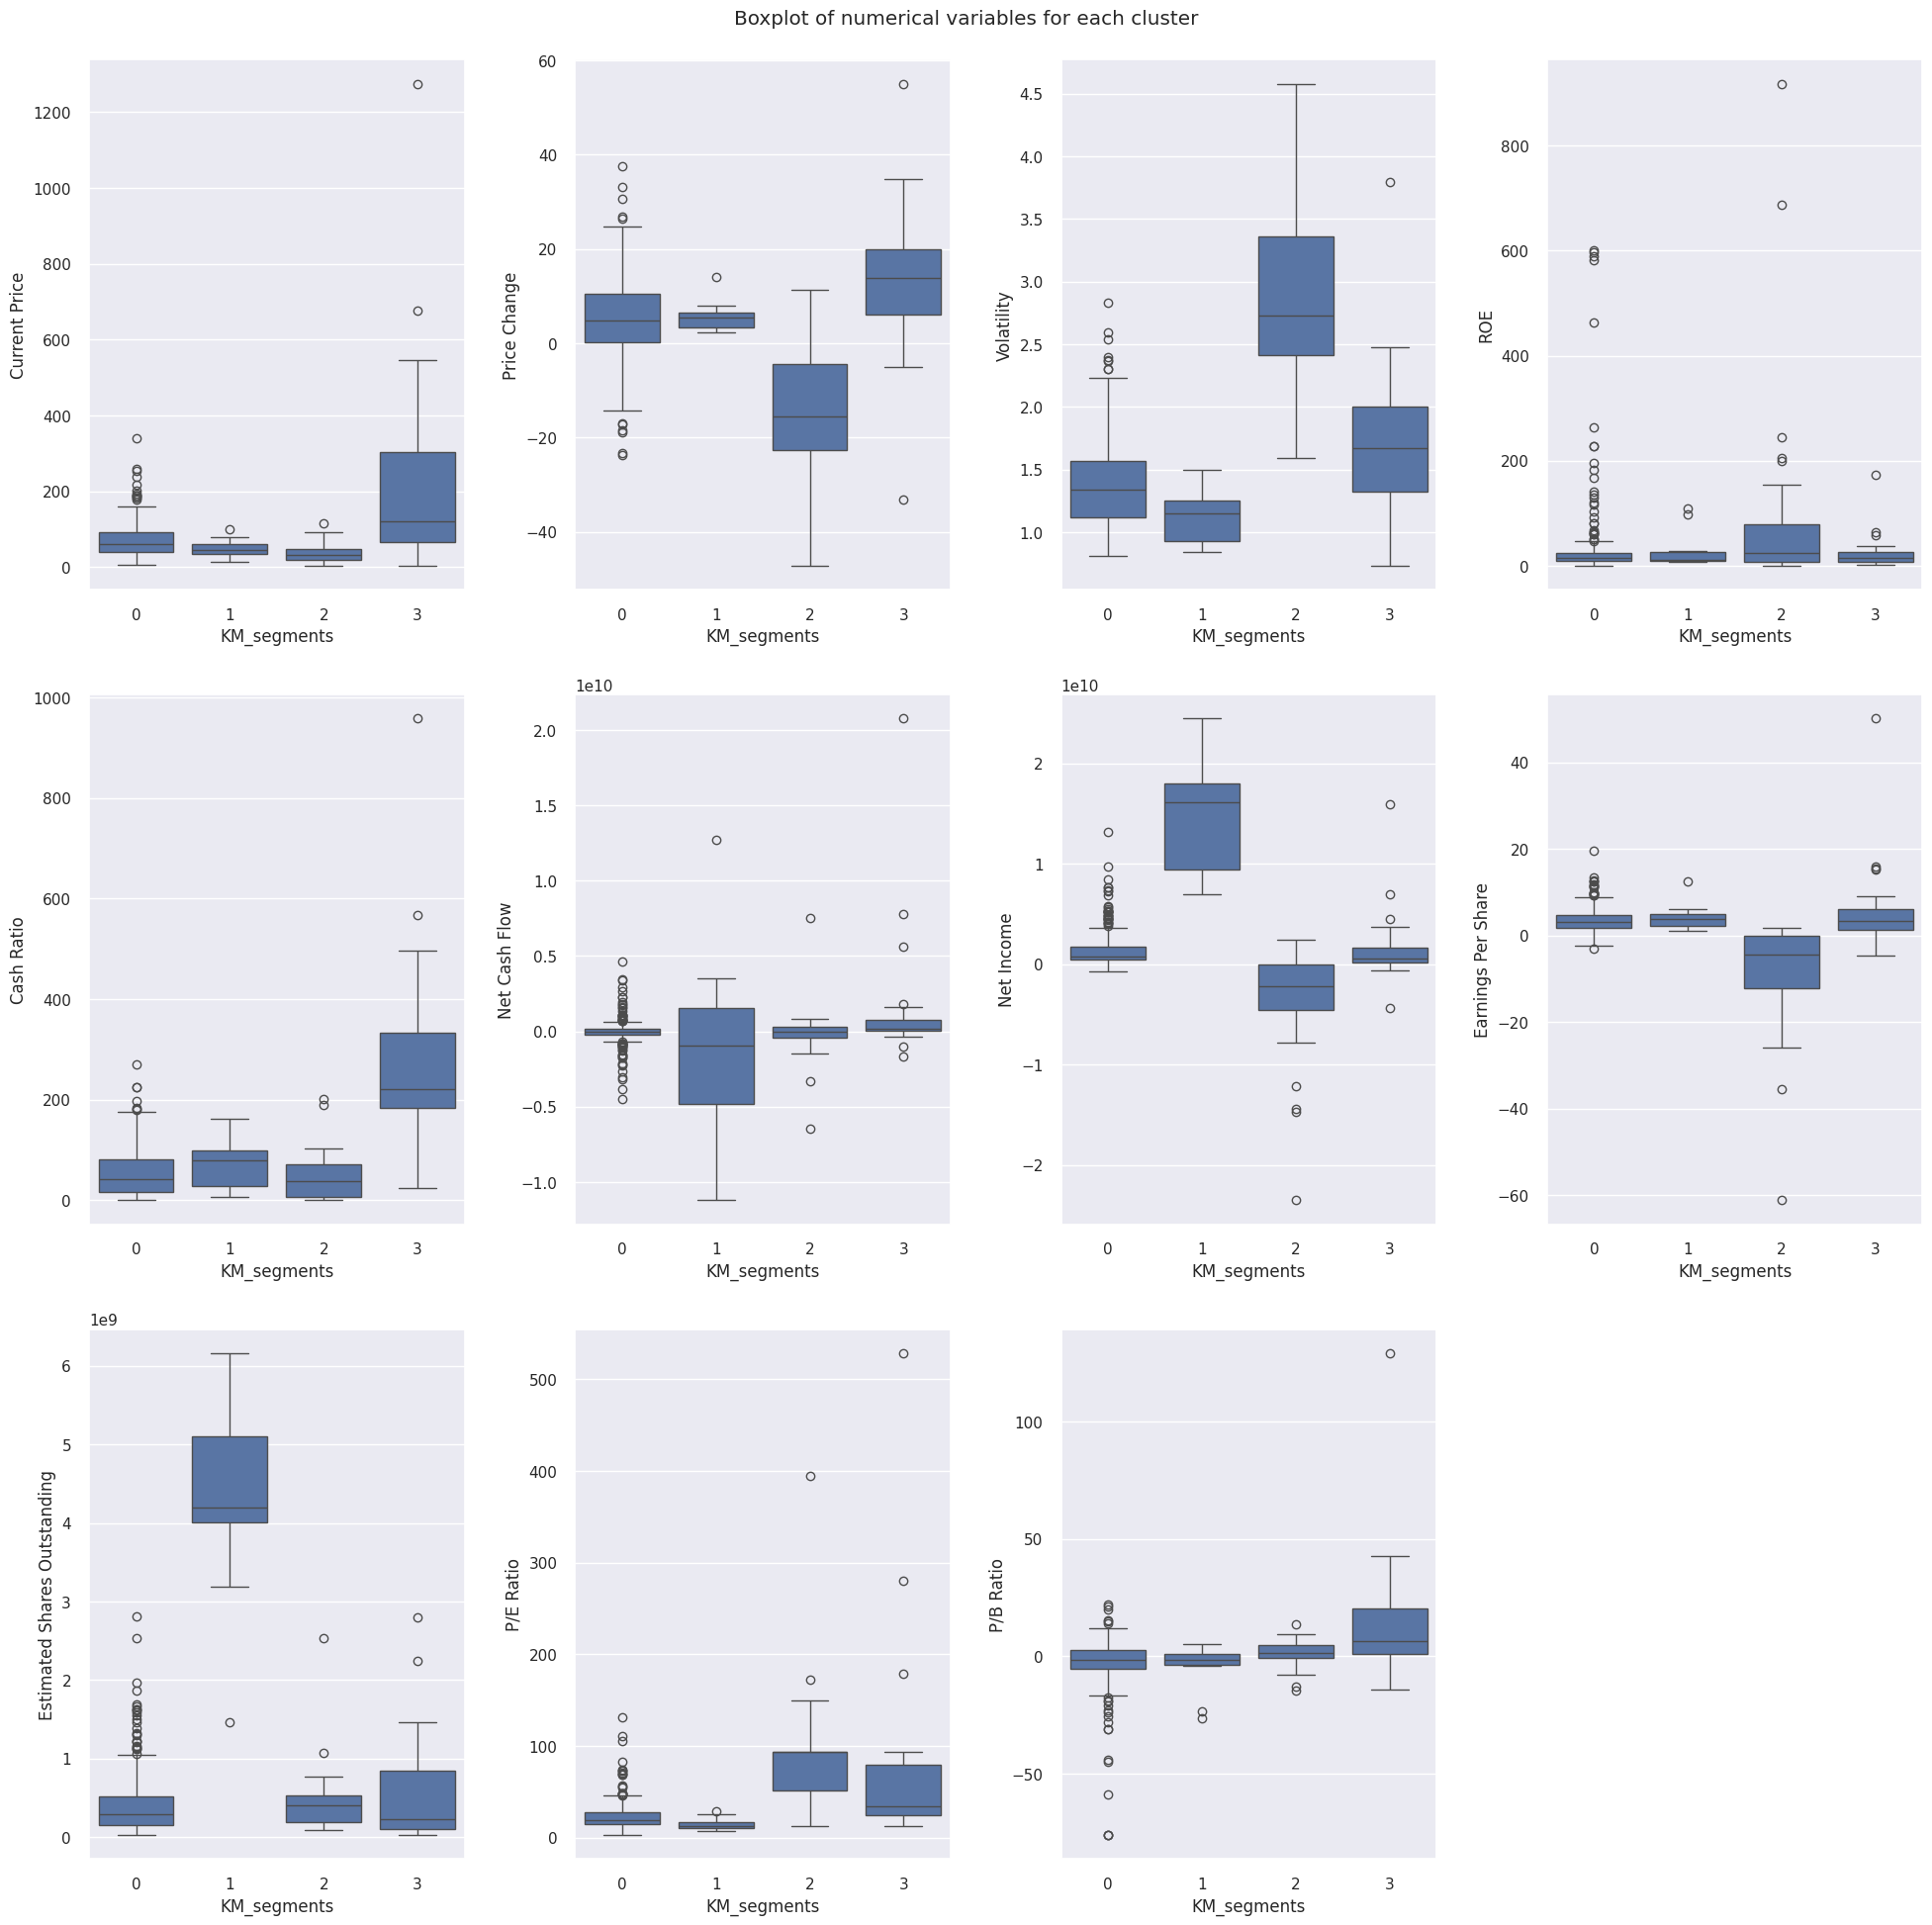

In [126]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

# Hierarchical clustering

In [129]:
HCmodel4 = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
HCmodel4.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [131]:
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel4.labels_
df2["HC_segments"] = HCmodel4.labels_

### Cluster profiling

In [132]:
hc_cluster4_profile = hc_df.groupby("HC_segments").mean()

In [134]:
hc_cluster4_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values)

In [135]:
hc_cluster4_profile.style.highlight_max(color="green", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,-0.335572,-1.279650,1.801017,1.628068,-0.329474,-0.283735,-1.294147,-1.743109,-0.107398,0.959689,-0.031863,29
1,2.505708,0.540932,0.197290,-0.261365,2.651985,0.120048,-0.160099,0.761418,-0.038039,1.817445,1.495760,15
2,-0.388253,0.182860,-0.681013,-0.174988,0.015849,0.258862,3.339022,0.096280,4.339952,-0.392255,-0.229907,11
3,-0.082748,0.094682,-0.167360,-0.145153,-0.106664,0.012562,0.011237,0.133578,-0.154577,-0.178168,-0.066608,285


We have a much better split in the case of 4 clusters with ward linkage. Even though there is still a massive cluster, others have a decent amount of population thus we can obtain more relevant information using this method.

In [136]:
# print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [137]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

Decent amount of variance too.

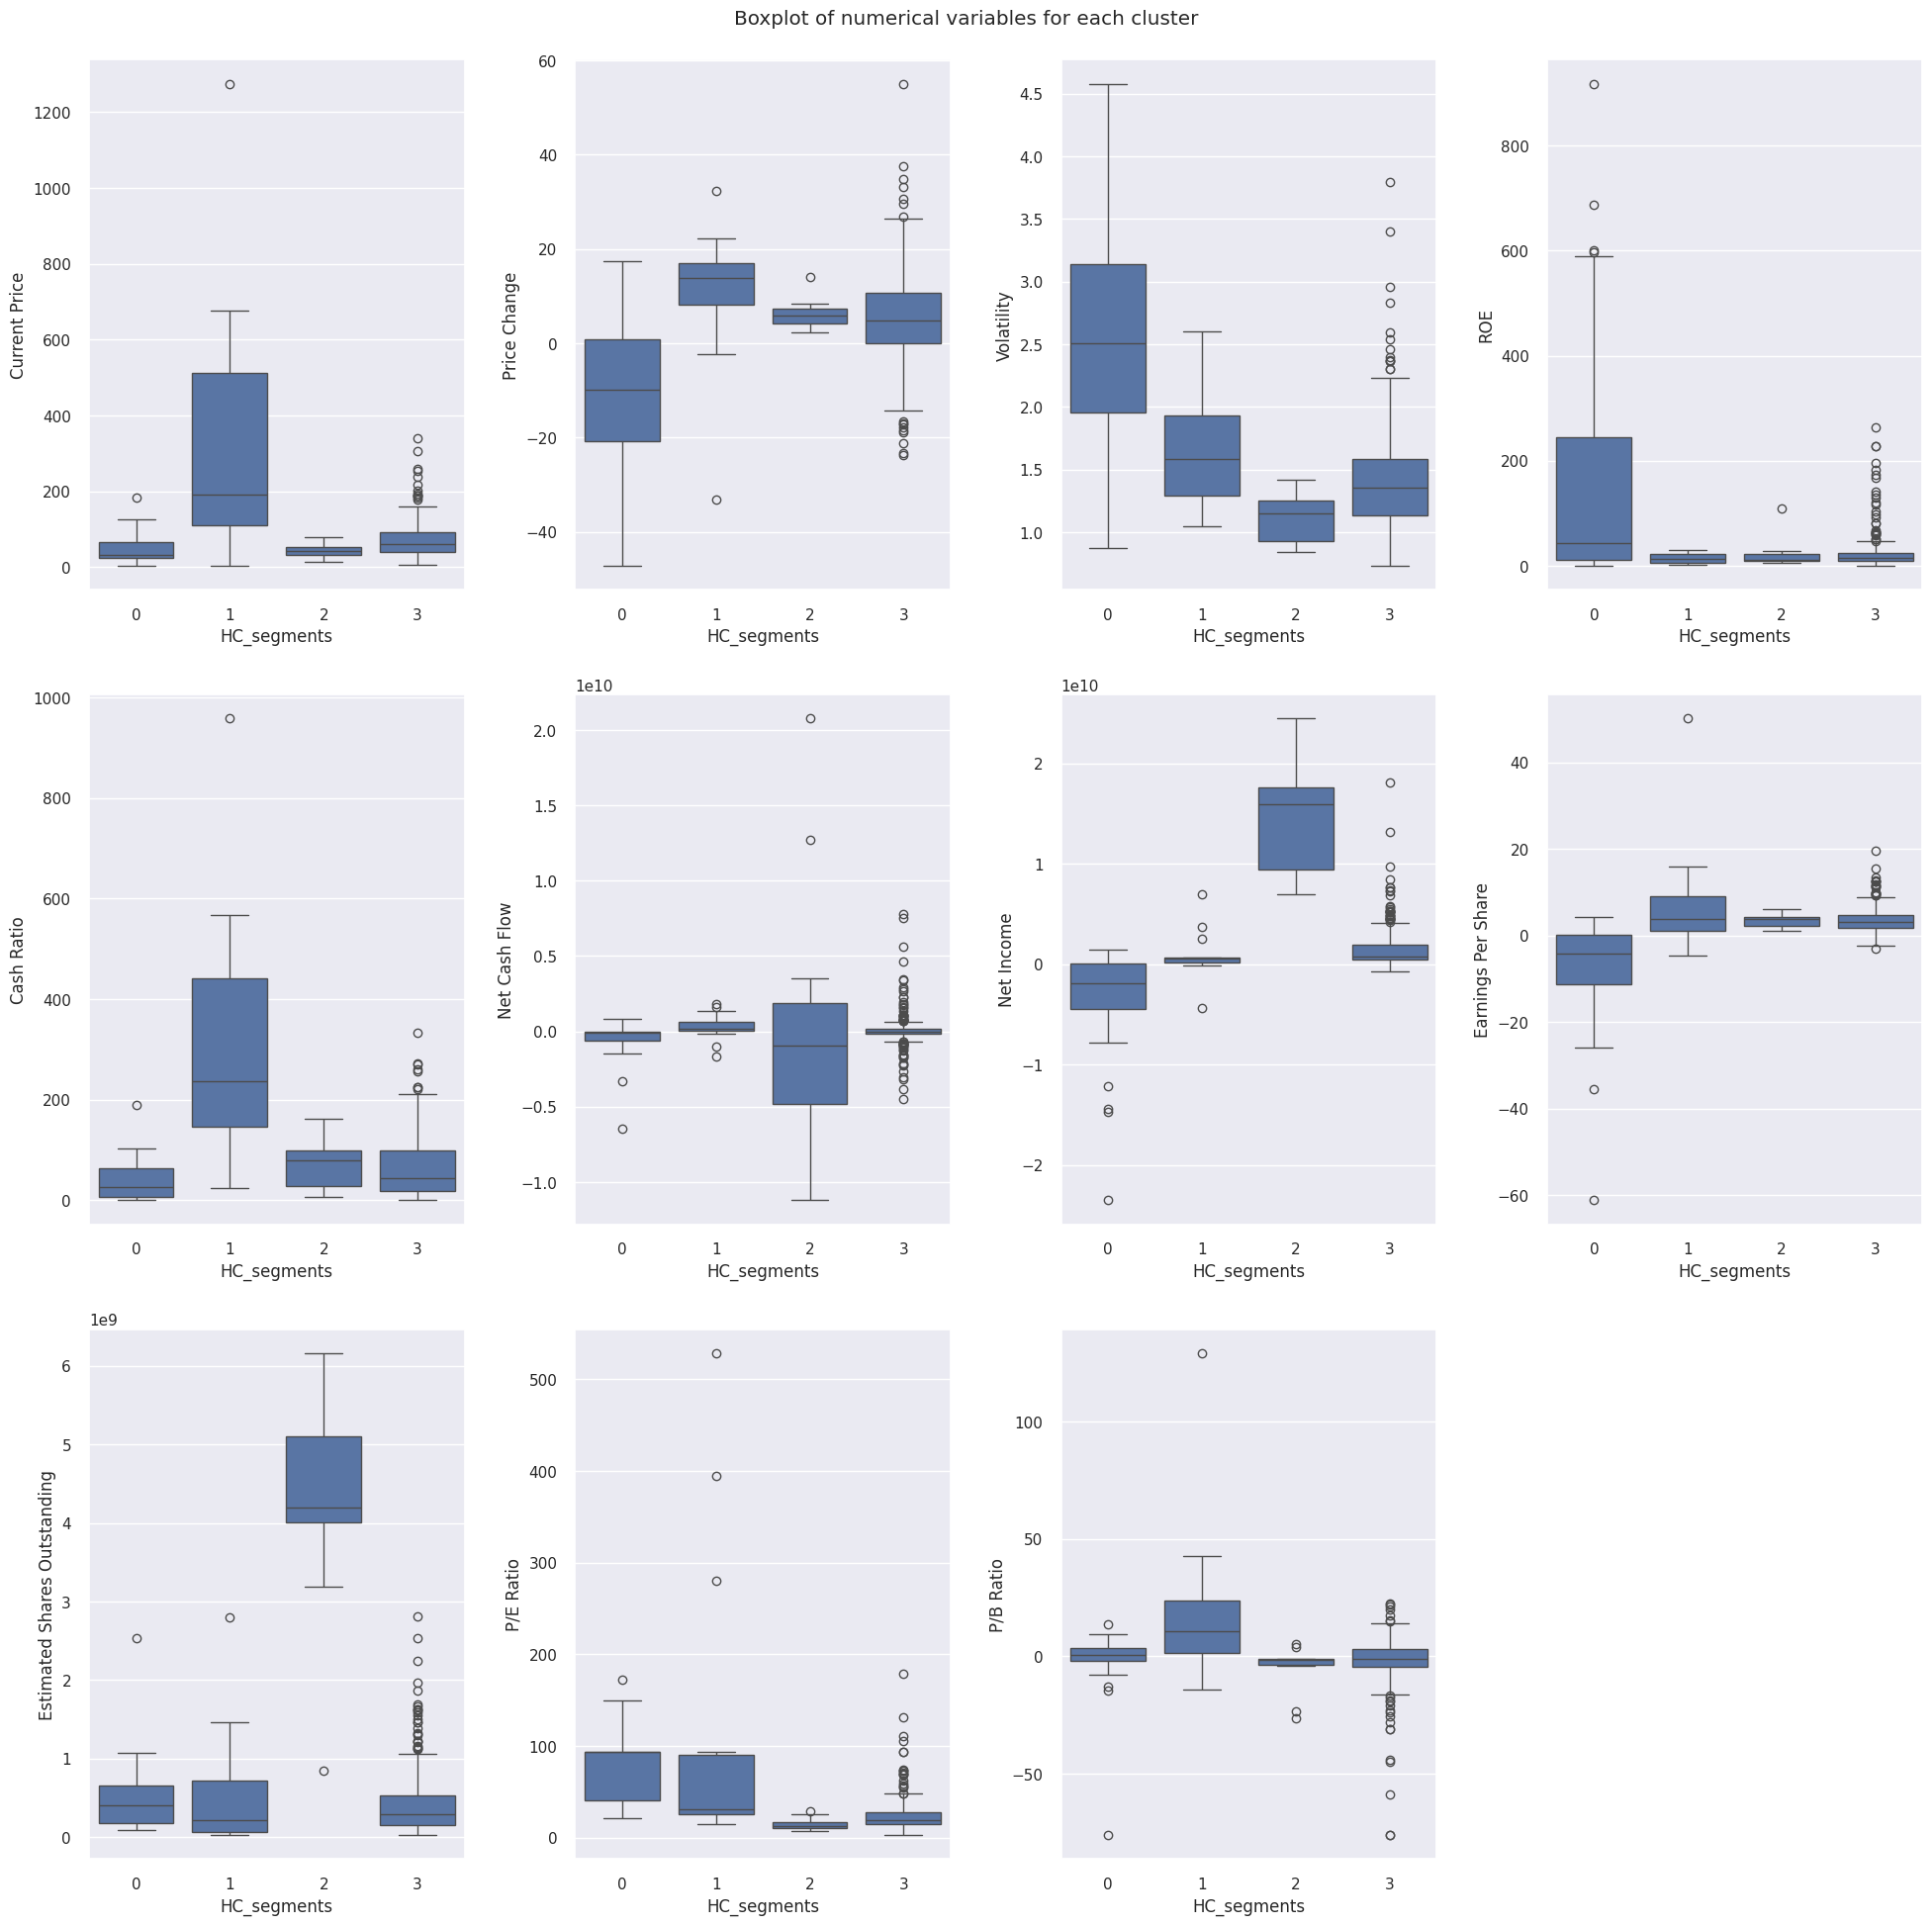

In [138]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

Adding a cluster with ward linkage method, we have a much more clear path to gain insights with bigger accuracy.

# 3 vs 4 cluster method

3 clusters were fine on k-means as every cluster had a decent population but performed poorly on hierarchical clustering, especially with single linkage. Small clusters had only 1 company while in the case of 4 clusters with ward linkage, the model was interpretable, and hence the information gained was more valuable.